In [1]:
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt # after importting matplotlib, mayavi can not set api to 2: first run mayavi!!!!
import scipy as sp
import scipy.ndimage 
#%matplotlib inline

from mayavi import mlab
from sklearn.decomposition import PCA

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
#mpl.style.use('bmh')
from latexify import latexify
import matplotlib.gridspec as gridspec
%matplotlib ipympl
%matplotlib ipympl
from scipy import ndimage
def myGfilter(U, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0,nanout=1): 
    #Gaussian filter with igonoring 'nan'
    #https://stackoverflow.com/questions/18697532/gaussian-filtering-a-image-with-nan-in-python
    
    nans = U!=U # positions of nan: nan is not equal to nan
    V=U.copy()
    V[nans]=0 # replace 'nan' by 'zero'
    VV=ndimage.gaussian_filter(V, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

    W=0*U.copy()+1 
    W[nans]=0 # label 'nan' and values with '0' and '1' respectively
    WW=ndimage.gaussian_filter(W, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    
    output = VV/WW
    if nanout:
        output[nans] = np.nan
    return output

In [2]:
import sys
print('\n'.join(sys.path))
print(plt.style.available)

C:\ProgramData\Anaconda3\python36.zip
C:\ProgramData\Anaconda3\DLLs
C:\ProgramData\Anaconda3\lib
C:\ProgramData\Anaconda3

C:\ProgramData\Anaconda3\lib\site-packages
C:\ProgramData\Anaconda3\lib\site-packages\win32
C:\ProgramData\Anaconda3\lib\site-packages\win32\lib
C:\ProgramData\Anaconda3\lib\site-packages\Pythonwin
C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\kew\.ipython
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [ ]:
print(2.5/np.sqrt(3))
print(2.5/np.sqrt(6))

In [3]:
jx=0.09137;jy=0.01425;jz=0.0457145;
print(np.sqrt((3*jz-jx)*(3*jz-jy)),np.sqrt((3*jz+jx)*(3*jz+jy)),3*np.sqrt((jz+jx)*(jz+jy)))

0.07500177079409526 0.18599854451648273 0.271996013761691


In [11]:
# Convert K to meV for Lhotels's paper
vs = np.array([-0.5,1.0,0.066])/11.6
print(vs) 
er = np.array([0.05,0.05,0.02])/11.6
print(er)
print(np.array([70,10])*np.pi/180)

[-0.04310345  0.0862069   0.00568966]
[0.00431034 0.00431034 0.00172414]
[1.22173048 0.17453293]


# Plot E-Q cut CNCS data exported from Matlab

## Plot E-Q 240mK and 450mK

In [3]:
# ２４０　ｍＫ ａｎｄ　４５０　ｍＫ
# find the files
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace'
fname = 'NZO_cncs_240mk_E-Q_*.txt'
#fname = 'NZO_cncs_450mk_E-Q_*.txt'

ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

NZO_cncs_240mk_E-Q_[11L].txt
NZO_cncs_240mk_E-Q_[hh0].txt
NZO_cncs_240mK_E-Q_[hh2-h].txt
NZO_cncs_240mk_E-Q_[hh2].txt
D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\NZO_cncs_240mk_E-Q_[11L].txt


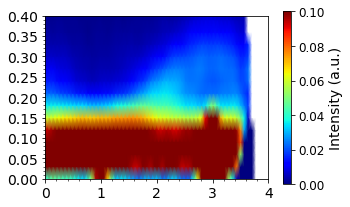

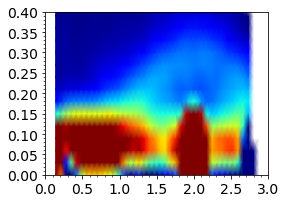

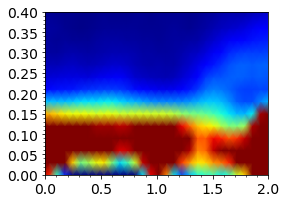

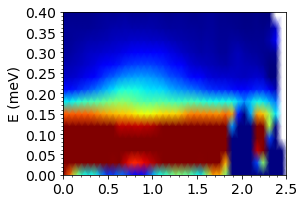

In [4]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ

# Colorbar limits and steps
#240mK
cb_max = [0.1,  0.1,  0.1,  0.1,  0.1,  0.05, 0.05,  0.05]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01]
label = '240 mK'
#450mK
# cb_max = [0.05,  0.05,  0.05,  0.05,  0.1,  0.05, 0.05,  0.05]
# cb_st =  [0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01]
# label = '450 mK'

x_label = ['(11L)','(HH0)','(HH2-H)','(HH2)']
x_lim=np.array([[0,4],[0,3],[0,2],[0,2.5]])
nb_of_files = 4
for i in np.arange(0,nb_of_files,1):
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    if i==2:# in the [HH2-H] data, x axis is 0.6667+q, so convert it back
        x=x+0.6667
    else:
        if x[1]<0:# change data from negative to positive part of the X axis
            x=-x
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])

    # Mask Nan
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure(figsize=(4,3))
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    #plt.axis([-3, 3, -0.05, 0.5])
    plt.xlim(x_lim[i,:])
    plt.ylim([0, 0.4])#plt.ylim([-0.05, 0.4])
    #plt.xlabel(x_label[i],size=14)
    if i==3:
        plt.ylabel(r'E (meV)',size=14)

    plt.minorticks_on()
    plt.xticks( color='k', size=14)
    plt.yticks( color='k', size=14)

    # set colorbar and its properties
    if i==0:# only plot colorbar for the last one
        cax = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
        cb = plt.colorbar(cax=cax,aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
        cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
        cb.ax.tick_params(labelsize=14)
        cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
        cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

    plt.show()

## Plot E-Q calculated by spinw

In [5]:
# Ｐｌｏｔ　ｔｈｅ　ｓｐｉｎ　ｗａｖｅ　ｏｆ　Ｎｄ２Ｚｒ２Ｏ７　ａｎｄ　ｔｈｅ　ｄａｔａ　ｉｓ　ｆｒｏｍ　Ｍａｔｌａｂ

#Load the file: every row for a energy (43 row [0,0.42]meV),every col (101*101) is a Q on Grid(X[3,3],Y[3,3])
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab'
fname = 'nzo_spinwI(E,Q)_[*.txt' # with '[' to avoid files with 'field[111]' in the name

ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

nzo_spinwI(E,Q)_[11h].txt
nzo_spinwI(E,Q)_[hh0].txt
nzo_spinwI(E,Q)_[hh2-h].txt
nzo_spinwI(E,Q)_[hh2].txt
D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\nzo_spinwI(E,Q)_[11h].txt


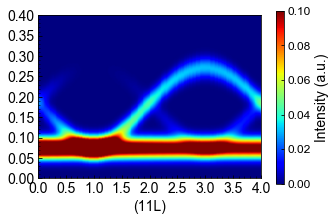

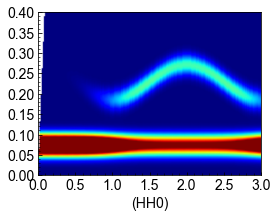

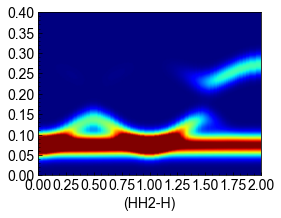

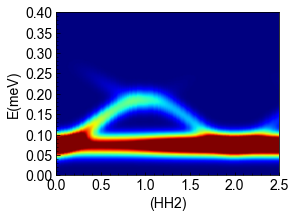

In [6]:
#Reshape data for plot
nQ = 201;
nE = 201;
x0 = np.linspace(0,2,nQ,endpoint=True) # for [HH2]
x1 = np.linspace(0,2.5,nQ,endpoint=True) # for [HH2-H]
x2 = np.linspace(0,3,nQ,endpoint=True) # for [HH0]，
x3 = np.linspace(0,4,nQ,endpoint=True) # for [11L]

x= [x3,x2,x0,x1]
y = np.linspace(0,0.5,nE,endpoint=True) # energy

nomalC=600000 # normalize it to use the experiment scale

# Colorbar limits and steps
cb_max = [0.1,  0.1,  0.1,  0.1,  0.1,  0.05, 0.05,  0.05]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01]

x_label = ['(11L)','(HH0)','(HH2-H)','(HH2)']
x_lim=np.array([[0,4],[0,3],[0,3],[0,2.5]])

nb_of_files = 4
for i in np.arange(0,nb_of_files,1):
    data = np.genfromtxt(fnames[i])/nomalC # data is nE by nQ
    # Smooth data: Gaussian filter
    #http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun
    sigma_y = 0
    sigma_x = 0
    sigma = [sigma_y, sigma_x]
    data = sp.ndimage.filters.gaussian_filter(data, sigma, mode='constant')

    # Plot
    latexify(columns=1)
    fig = plt.figure(figsize=(4,3))
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet # plt.cm.RdBu_r
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(x[i],y, data, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap

    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    #plt.axis([-3, 3, -0.05, 0.5])
    #plt.xlim(x_lim[i,:])
    plt.ylim([0, 0.4])
    plt.xlabel(x_label[i],size=14)
    if i==3:
        plt.ylabel('E(meV)',size=14)

    plt.minorticks_on()
    plt.xticks( color='k', size=14)
    plt.yticks( color='k', size=14)

    # set colorbar and its properties
    if i==0:# only plot colorbar for the last one
        cax = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
        cb = plt.colorbar(cax=cax,aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
        cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
        cb.ax.tick_params(labelsize=14)
        cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
        cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')
    
    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

    plt.show()

## Plot Spinw E-Q in [111] fields
1. single plots
2. 2*7 subplots
3. 3*2 subplots
4. 5 subplots

In [7]:
# Ｐｌｏｔ　ｔｈｅ　ｓｐｉｎ　ｗａｖｅ　ｏｆ　Ｎｄ２Ｚｒ２Ｏ７　ａｎｄ　ｔｈｅ　ｄａｔａ　ｉｓ　ｆｒｏｍ　Ｍａｔｌａｂ
#Load the file: every row for a energy (43 row [0,0.42]meV),every col (101*101) is a Q on Grid(X[3,3],Y[3,3])
fpath= r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab'
fname = 'nzo_spinwI(E,Q)_field_flip*.txt' # first domian: feild flips the triangle alttice
#fname = 'nzo_spinwI(E,Q)_field[-1-1-1*.txt' # second domain: feild flips the kagome lattice
ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

nzo_spinwI(E,Q)_field_flip_kagome0.00T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.00T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.07T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.07T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.15T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.15T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.25T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.25T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.50T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.50T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.75T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome0.75T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_kagome1.00T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_kagome1.00T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_tri0.00T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_tri0.00T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_tri0.07T_[-1-h1-h2h].txt
nzo_spinwI(E,Q)_field_flip_tri0.07T_[-2h2-h].txt
nzo_spinwI(E,Q)_field_flip_tri0.15T_[-1-h1-h2h].t

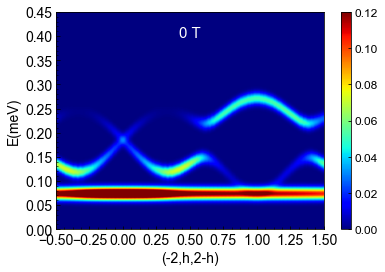

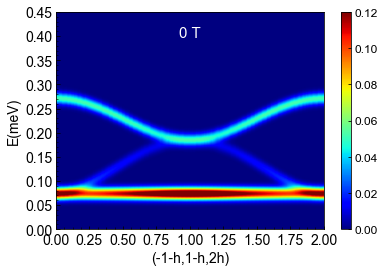

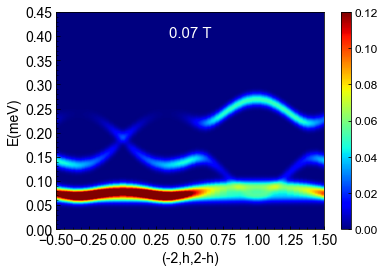

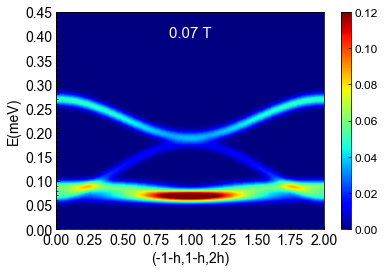

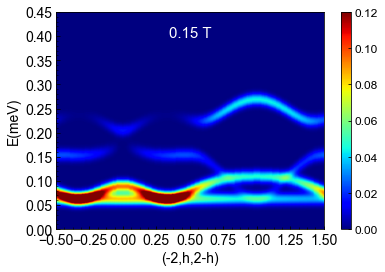

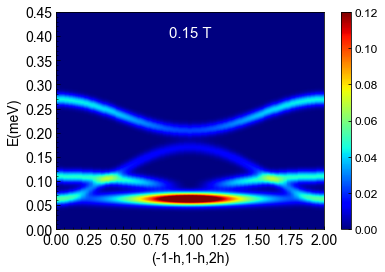

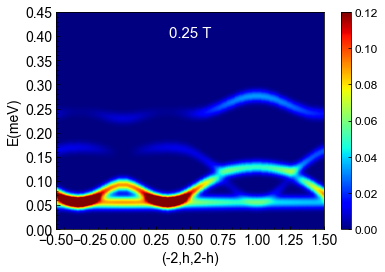

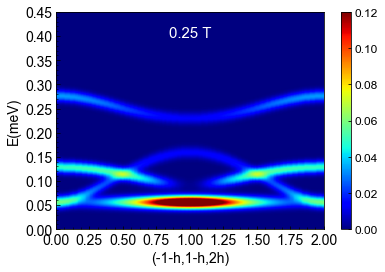

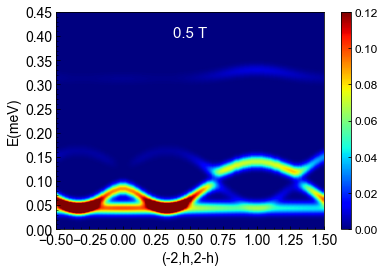

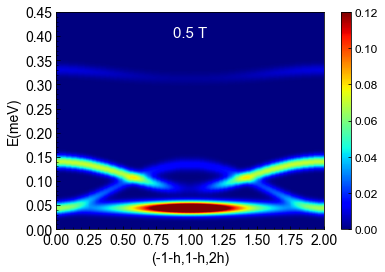

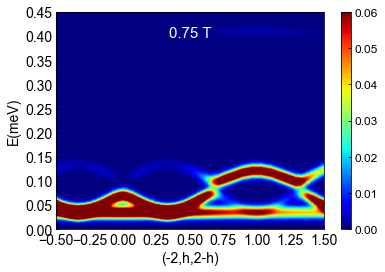

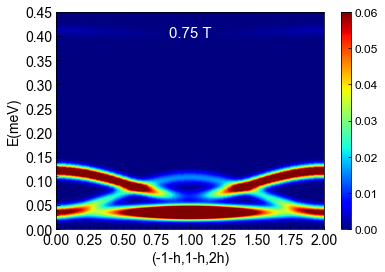

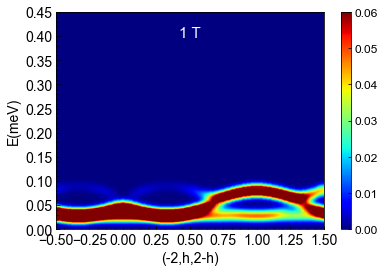

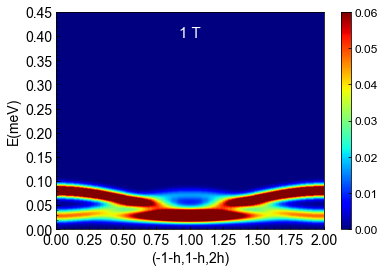

In [8]:
##### Single plots ######
# Reshape data for plot
nQ = 201;
nE = 451;
x1 = np.linspace(-0.5,1.5,nQ,endpoint=True) # for [-1-h1-h2h]
x2 = np.linspace(0,2,nQ,endpoint=True) # for [-2h2-h]
y = np.linspace(0,0.45,nE,endpoint=True) # energy

nomalC=1000000 # normalize it to use the experiment scale

# Colorbar limits and steps
cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.06, 0.06, 0.06,  0.06]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,  0.01]

x_label = ['(-2,h,2-h)','(-1-h,1-h,2h)']
#x_lim=np.array([[0,4],[0,3],[0,2],[0,2.5]])
B_label = ['0 T','0.07 T','0.15 T','0.25 T','0.5 T','0.75 T','1 T']

nb_of_files = 14
for i in np.arange(0,nb_of_files,1):
    data = np.genfromtxt(fnames[i])/nomalC # data is nE by nQ
    # Smooth data: Gaussian filter
    #http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun
    sigma_y = 0
    sigma_x = 0
    sigma = [sigma_y, sigma_x]
    data = sp.ndimage.filters.gaussian_filter(data, sigma, mode='constant')

    # Plot
    fig = plt.figure(figsize=(6,4))
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet # plt.cm.RdBu_r
    cmap.set_bad('w',1.)
    if np.mod(i,2)==0:
        pcol = plt.pcolormesh(x1,y, np.fliplr(data), vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    else:
        pcol = plt.pcolormesh(x2,y, data, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap

    pcol.set_edgecolor('face') # remove the white lines in the plot
    plt.text(0.5, 0.9, B_label[i//2],size=15,color='w', ha='center', va='center',transform=plt.gca().transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.xlim(x_lim[i,:])
    plt.ylim([0, 0.45])
    plt.xlabel(x_label[np.mod(i,2)],size=14)
    plt.ylabel('E(meV)',size=14)

    plt.minorticks_on()
    plt.xticks(color='k', size=14)
    plt.yticks(color='k', size=14)

    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    #cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

    #cb.ax.tick_params(labelsize=12)
    cb.set_ticks(np.arange(0, cb_max[i]+cb_st[i],cb_st[i]))
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

    plt.show()

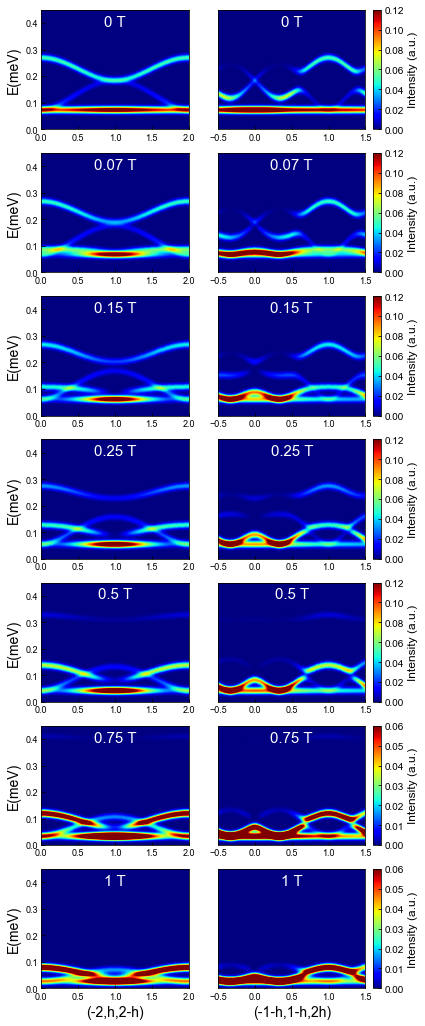

In [12]:
##### Plot the 2*7 fourteen subplots #####
#Reshape data for plot
nQ = 201;
nE = 451;
x1 = np.linspace(-0.5,1.5,nQ,endpoint=True) # for [-1-h1-h2h]
x2 = np.linspace(0,2,nQ,endpoint=True) # for [-2h2-h]
y = np.linspace(0,0.45,nE,endpoint=True) # energy

nomalC=1000000 # normalize it to use the experiment scale

# Colorbar limits and steps
# first domain
cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.06, 0.06, 0.06,  0.06]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,  0.01]
# second domain
# cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,  0.12]
# cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,  0.02]

x_label = ['(-1-h,1-h,2h)','(-2,h,2-h)']
#x_lim=np.array([[0,4],[0,3],[0,2],[0,2.5]])
B_label = ['0 T','0.07 T','0.15 T','0.25 T','0.5 T','0.75 T','1 T']

nb_of_files = 14
fig,axs = plt.subplots(figsize=(7,18),nrows=7,ncols=2)
for i in  np.arange(0,nb_of_files,1): #[0,1, 6,7, 10,11]: #
    data = np.genfromtxt(fnames[i])/nomalC # data is nE by nQ
    # Smooth data: Gaussian filter
    #http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun
#     sigma_y = 0
#     sigma_x = 0
#     sigma = [sigma_y, sigma_x]
#     data = sp.ndimage.filters.gaussian_filter(data, sigma, mode='constant')

    # Plot
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet # plt.cm.RdBu_r
    cmap.set_bad('w',1.)
    
    if np.mod(i,2)==0:
        ax = axs[i//2,1]
        pcol = ax.pcolormesh(x1,y, np.fliplr(data), vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    else:
        ax = axs[i//2,0]
        pcol = ax.pcolormesh(x2,y, data, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap

    pcol.set_edgecolor('face') # remove the white lines in the plot
    ax.text(0.5, 0.9, B_label[i//2],size=15,color='w', ha='center', va='center',transform=ax.transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.xlim(x_lim[i,:])
    ax.set_ylim([0, 0.45])
    ax.set_yticks(np.arange(0, 0.5,.1))
    
    if i in [12,13]:
        ax.set_xlabel(x_label[np.mod(i,2)],size=14)
    if i in [1,3,5,7,9,11,13]:
        ax.set_ylabel('E(meV)',size=14)
    if i in [0,2,4,6,8,10,12]:
        ax.get_yaxis().set_ticks([])
        # set colorbar and its properties (get the two pannels in the same row to have the same width though the 2nd one has a cb)
        # https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
        cb = plt.colorbar(pcol,ax=[axs[i//2,0],axs[i//2,1]],aspect=15,pad=0.02,orientation="vertical") # label='Intensity', ticks=range(0,100)
        cb.ax.set_ylabel('Intensity (a.u.)',fontsize=12)
        #cb.ax.tick_params(labelsize=12)
        cb.set_ticks(np.arange(0, cb_max[i]+cb_st[i],cb_st[i]))
        cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=10)#, weight='bold')
#fig.savefig(fnames[0].replace("_0.00T_[-1-h1-h2h].txt", "_7p.pdf"), bbox_inches="tight",verbose=True)  
plt.show()

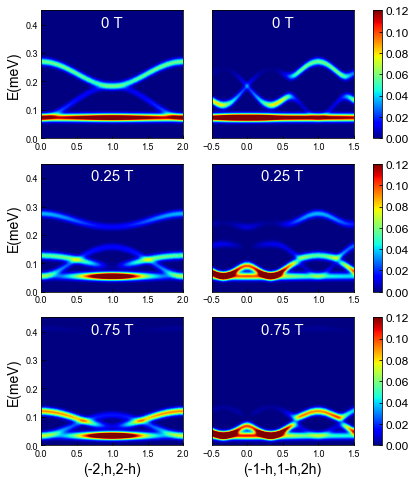

In [13]:
##### Plot the six subplots #####
#Reshape data for plot
nQ = 201;
nE = 451;
x1 = np.linspace(-0.5,1.5,nQ,endpoint=True) # for [-1-h1-h2h]
x2 = np.linspace(0,2,nQ,endpoint=True) # for [-2h2-h]
y = np.linspace(0,0.45,nE,endpoint=True) # energy

nomalC=900000 # normalize it to use the experiment scale

# Colorbar limits and steps
# first domain
cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.06, 0.06, 0.06,  0.06]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,  0.01]
# second domain
cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,  0.12]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,  0.02]

x_label = ['(-2,h,2-h)','(-1-h,1-h,2h)']
#x_lim=np.array([[0,4],[0,3],[0,2],[0,2.5]])
B_label = ['0 T','0.07 T','0.15 T','0.25 T','0.5 T','0.75 T','1 T']

fig,axs = plt.subplots(figsize=(7,8),nrows=3,ncols=2)
axs = axs.reshape(-1)
ii = 0
for i in [1,0, 7,6, 11,10]: 
    data = np.genfromtxt(fnames[i])/nomalC # data is nE by nQ
    # Smooth data: Gaussian filter
    #http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun
#     sigma_y = 0
#     sigma_x = 0
#     sigma = [sigma_y, sigma_x]
#     data = sp.ndimage.filters.gaussian_filter(data, sigma, mode='constant')

    # Plot
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet # plt.cm.RdBu_r
    cmap.set_bad('w',1.)
    
    ax = axs[ii]
    if np.mod(i,2)==0:
        pcol = ax.pcolormesh(x1,y, np.fliplr(data), vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    else:
        pcol = ax.pcolormesh(x2,y, data, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    
    pcol.set_edgecolor('face') # remove the white lines in the plot
    ax.text(0.5, 0.9, B_label[i//2],size=15,color='w', ha='center', va='center',transform=ax.transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.xlim(x_lim[i,:])
    ax.set_ylim([0, 0.45])
    ax.set_yticks(np.arange(0, 0.5,.1))
    if ii in [4,5]:
        ax.set_xlabel(x_label[np.mod(ii,2)],size=14)
    if ii in [0,2,4]:
        ax.set_ylabel('E(meV)',size=14)
    if ii in [1,3,5]:
        ax.get_yaxis().set_ticks([])
        # set colorbar and its properties (get the two pannels in the same row to have the same width though the 2nd one has a cb)
        # https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
        cb = plt.colorbar(pcol,ax=[axs[ii-1],axs[ii]],aspect=15,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
        #cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
        #cb.ax.tick_params(labelsize=12)
        cb.set_ticks(np.arange(0, cb_max[i]+cb_st[i],cb_st[i]))
        cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')
    ii = ii+1
#fig.savefig(fnames[0].replace("_0.00T_[-1-h1-h2h].txt", "_3p.pdf"), bbox_inches="tight",verbose=True)  
plt.show()

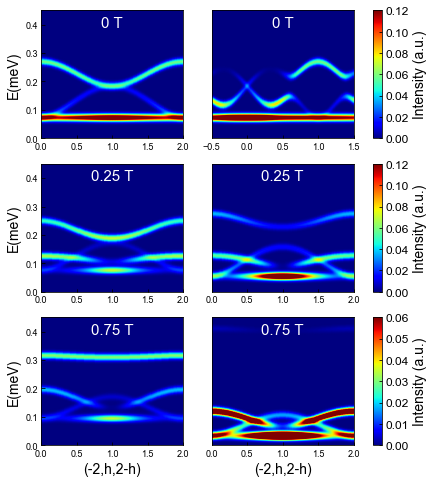

In [14]:
##### Plot the six subplots: compare H//111 and -H//111 #####
#Reshape data for plot
nQ = 201;
nE = 451;
x1 = np.linspace(-0.5,1.5,nQ,endpoint=True) # for [-1-h1-h2h]
x2 = np.linspace(0,2,nQ,endpoint=True) # for [-2h2-h]
y = np.linspace(0,0.45,nE,endpoint=True) # energy

nomalC=900000 # normalize it to use the experiment scale

# Colorbar limits and steps
# first domain
cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.06, 0.06, 0.06,  0.06]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,  0.01]
# second domain
#cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,  0.12]
#cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,  0.02]

#x_label = ['(-2,h,2-h)','(-1-h,1-h,2h)']
x_label = ['(-2,h,2-h)','(-2,h,2-h)']
B_label = ['0 T','0.07 T','0.15 T','0.25 T','0.5 T','0.75 T','1 T']

fig,axs = plt.subplots(figsize=(7,8),nrows=3,ncols=2)
axs = axs.reshape(-1)
ii = 0
for i in [15,0, 21,7, 25,11]:
    data = np.genfromtxt(fnames[i])/nomalC # data is nE by nQ
    # Smooth data: Gaussian filter
    #http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun
#     sigma_y = 0
#     sigma_x = 0
#     sigma = [sigma_y, sigma_x]
#     data = sp.ndimage.filters.gaussian_filter(data, sigma, mode='constant')

    # Plot
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet # plt.cm.RdBu_r
    cmap.set_bad('w',1.)

    ax = axs[ii]
    if np.mod(i,2)==0:
        pcol = ax.pcolormesh(x1,y, np.fliplr(data), vmin=0, vmax=cb_max[i%14], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    else:
        pcol = ax.pcolormesh(x2,y, data, vmin=0, vmax=cb_max[i%14], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    
    pcol.set_edgecolor('face') # remove the white lines in the plot
    ax.text(0.5, 0.9, B_label[(i%14)//2],size=15,color='w', ha='center', va='center',transform=ax.transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.xlim(x_lim[i,:])
    ax.set_ylim([0, 0.45])
    ax.set_yticks(np.arange(0, 0.5,.1))
    if ii in [4,5]:
        ax.set_xlabel(x_label[np.mod(ii,2)],size=14)
    if ii in [0,2,4]:
        ax.set_ylabel('E(meV)',size=14)
    if ii in [1,3,5]:
        ax.get_yaxis().set_ticks([])
        # set colorbar and its properties (get the two pannels in the same row to have the same width though the 2nd one has a cb)
        # https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
        cb = plt.colorbar(pcol,ax=[axs[ii-1],axs[ii]],aspect=15,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
        cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
        cb.ax.tick_params(labelsize=12)
        cb.set_ticks(np.arange(0, cb_max[i%14]+cb_st[i%14],cb_st[i%14]))
        cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i%14]+cb_st[i%14],
                                                                     cb_st[i%14])], fontsize=12)#, weight='bold')
    ii = ii+1
#fig.savefig(fnames[0].replace("_0.00T_[-1-h1-h2h].txt", "_3p.pdf"), bbox_inches="tight",verbose=True)  
plt.show()

In [99]:
fig.savefig(fnames[0].replace("kagome0.00T_[-1-h1-h2h].txt", "_tri_kagome.pdf"), bbox_inches="tight",verbose=True)  

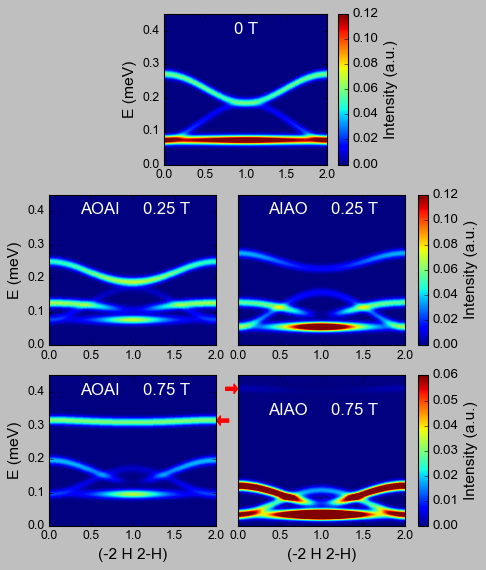

In [178]:
##### Plot the five subplots: compare H//111 and -H//111 #####
#Reshape data for plot
nQ = 201;
nE = 451;
x1 = np.linspace(-0.5,1.5,nQ,endpoint=True) # for [-1-h1-h2h]
x2 = np.linspace(0,2,nQ,endpoint=True) # for [-2h2-h]
y = np.linspace(0,0.45,nE,endpoint=True) # energy

nomalC=900000 # normalize it to use the experiment scale

# Colorbar limits and steps
# first domain
cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.06, 0.06, 0.06,  0.06]
cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,  0.01]
# second domain
#cb_max = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,  0.12]
#cb_st =  [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,  0.02]

#x_label = ['(-2,h,2-h)','(-1-h,1-h,2h)']
x_label = ['(-2,h,2-h)','(-2,h,2-h)']
texts   = ['AIAO','AOAI']; xcoo = [0.5,0.5,0.5,0.5,0.5]; ycoo = [0.9,0.9,0.9,0.9,0.77]
B_label = ['0 T','0.07 T','0.15 T','0.25 T','0.5 T','0.75 T','1 T']

fig = plt.figure(figsize=(7,8))

gs = gridspec.GridSpec(3,4,hspace=0.2,wspace=0.3)

# axs = [plt.subplot2grid((3, 4), (0, 1),colspan=2) if i==0 
#        else plt.subplot2grid((3, 4), ((i+1)//2, (i+1)%2*2),colspan=2) for i in [0,1,2,3,4]]
axs = [fig.add_subplot(gs[0, 1:3]) if i==0 
       else fig.add_subplot(gs[(i+1)//2, (i+1)%2*2:(i+1)%2*2+2]) for i in [0,1,2,3,4]]

ii = 0
for i in [15, 21,7, 25,11]:
    data = np.genfromtxt(fnames[i])/nomalC # data is nE by nQ
    cmap = plt.cm.jet # plt.cm.RdBu_r
    cmap.set_bad('w',1.)

    ax = axs[ii]
    if np.mod(i,2)==0:
        pcol = ax.pcolormesh(x1,y, np.fliplr(data), vmin=0, vmax=cb_max[i%14], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    else:
        pcol = ax.pcolormesh(x2,y, data, vmin=0, vmax=cb_max[i%14], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    
    pcol.set_edgecolor('face') # remove the white lines in the plot
    if ii==0:
        ax.text(xcoo[ii], ycoo[ii], B_label[(i%14)//2],size=15,color='w', ha='center', va='center',transform=ax.transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    else:
        ax.text(xcoo[ii]+0.2, ycoo[ii], B_label[(i%14)//2],size=15,color='w', ha='center', va='center',transform=ax.transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        ax.text(xcoo[ii]-0.2, ycoo[ii],   texts[ii%2],size=15,color='w', ha='center', va='center',transform=ax.transAxes,
                 backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        
    # set the limits of the plot to the limits of the data
    ax.set_ylim([0, 0.45])
    ax.set_yticks(np.arange(0, 0.5,.1))
    ax.tick_params(axis='both', labelsize=11)
    if ii in [3,4]:
        ax.set_xlabel('(-2 H 2-H)',size=14)
    if ii in [0,1,3]:
        ax.set_ylabel('E (meV)',size=14)
    if ii in [2,4]:
        ax.get_yaxis().set_ticks([])
    if ii in [0,2,4]:
        if ii==0:
            cb = plt.colorbar(pcol,ax=axs[ii],aspect=15,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
        else:
            cb = plt.colorbar(pcol,ax=[axs[ii-1],axs[ii]],aspect=15,pad=0.03,orientation="vertical") # label='Intensity', ticks=range(0,100)            
        cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
        cb.ax.tick_params(labelsize=12)
        cb.set_ticks(np.arange(0, cb_max[i%14]+cb_st[i%14],cb_st[i%14]))
        cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i%14]+cb_st[i%14],
                                                                     cb_st[i%14])], fontsize=12)#, weight='bold')
    if ii==3:
        ax.arrow(2.15,0.315,-0.10,0,color='red',transform=ax.transData,clip_on=False,width=0.01)
    elif ii==4:
        ax.arrow(-0.15,0.41,0.10,0,color='red',transform=ax.transData,clip_on=False,width=0.01)
        
    ii = ii+1
fig.savefig(fnames[0].replace("kagome0.00T_[-1-h1-h2h].txt", "_tri_kagome_5center.pdf"), 
            bbox_inches="tight",pad_inches=0,verbose=True)  
plt.show()

## Spinw I-E integrated over the [111] plane 

In [129]:
# Plot the calcualted I-E integrated over the [111] plane in fields
#first column: E
#other columns: I in different fields
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab'
fname = 'nzo_spinwIE_field*.txt' 
ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

nzo_spinwIE_field[-1-1-1]_0-1T.txt
nzo_spinwIE_field[111]_0-1T.txt
D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\nzo_spinwIE_field[-1-1-1]_0-1T.txt


FigureCanvasNbAgg()

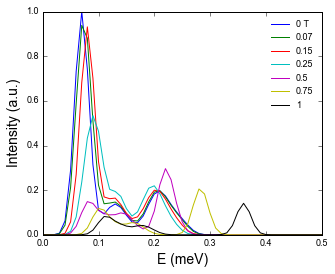

In [130]:
# Ｐｌｏｔ　ｔｈｅ [00-2]
fidx = 1 # which domain to plot

fname = os.path.join(fpath, fnames[fidx])
data = np.genfromtxt(fname,skip_header=1)
data[:,1:] = data[:,1:]/np.max(data[:,1:])

fig=plt.figure(figsize=(5,4))
lables=['0 T','0.07','0.15','0.25','0.5','0.75','1']
ax = fig.add_subplot(111)#, yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
for i in range(1,8):
    ax.plot(data[:,0],data[:,i],label=lables[i-1])
    
# plt.text(0.35,0.1,r'Q$=(200)$',size=15, ha='center', va='center',
#         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#ax.set_xlim([-0.2,0.5])    
#ax.set_ylim([0.002,3.5])  
ax.legend(numpoints=1,frameon=False, loc='best')  
ax.set_xlabel('E (meV)',size=14)
ax.set_ylabel('Intensity (a.u.)',size=14)

#fig.savefig((fnames[fidx]).replace('.txt','.pdf'),bbox_inches="tight", verbose=True)
plt.show()

# Plot constant E cut CNCS data exported from Matlab

In [24]:
# ２４０　ｍＫ　ａｎｄ　４５０　ｍＫ
# find the files
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace'
fname = 'NZO_cncs_240mk_consEcut_dE*.txt'
fname = 'NZO_cncs_450mk_consEcut_dE*.txt'
ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

# ２４０　ｍＫ　ａｎｄ　４５０　ｍＫ
# find the files
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace'
fname = 'NZO_cncs_240mk_consEcut_dE*_sym.txt'
ii=0 #index for different files
fnames240sym = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames240sym.append(os.path.join(fpath,file))
print(fnames240sym [0])

NZO_cncs_450mk_consEcut_dE0.00-0.03.txt
NZO_cncs_450mk_consEcut_dE0.03-0.06.txt
NZO_cncs_450mk_consEcut_dE0.05-0.08.txt
NZO_cncs_450mk_consEcut_dE0.06-0.09.txt
NZO_cncs_450mk_consEcut_dE0.10-0.13.txt
NZO_cncs_450mk_consEcut_dE0.15-0.18.txt
NZO_cncs_450mk_consEcut_dE0.20-0.23.txt
NZO_cncs_450mk_consEcut_dE0.25-0.28.txt
NZO_cncs_450mk_consEcut_dE0.30-0.33.txt
NZO_cncs_450mk_consEcut_dE0.35-0.38.txt
D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\NZO_cncs_450mk_consEcut_dE0.00-0.03.txt
NZO_cncs_240mk_consEcut_dE0.00-0.03_sym.txt
NZO_cncs_240mk_consEcut_dE0.05-0.08_sym.txt
NZO_cncs_240mk_consEcut_dE0.10-0.13_sym.txt
NZO_cncs_240mk_consEcut_dE0.15-0.18_sym.txt
NZO_cncs_240mk_consEcut_dE0.20-0.23_sym.txt
NZO_cncs_240mk_consEcut_dE0.25-0.28_sym.txt
NZO_cncs_240mk_consEcut_dE0.30-0.33_sym.txt
NZO_cncs_240mk_consEcut_dE0.35-0.38_sym.txt
D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\NZO_cncs_240mk_consEcut_dE0.00-0.03_sym.txt


In [169]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ
# Colorbar limits and steps
#240mK
cb_max = [0.3,  0.3,  0.3,  0.1,  0.1,  0.05, 0.05,  0.05]
cb_st =  [0.05, 0.05, 0.05, 0.02, 0.02, 0.01, 0.01, 0.01]
e_label = [0.015, 0.065, 0.115, 0.165, 0.215, 0.265, 0.315, 0.365]
nb_of_files = 8
#450mK
cb_max = [0.2,  0.3,  0.3,  0.3, 0.1,  0.05,  0.03,  0.03, 0.02,  0.02]
cb_st =  [0.05, 0.05, 0.05,  0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
e_label = [0.015, 0.045, 0.065, 0.075, 0.115, 0.165, 0.215, 0.265, 0.315, 0.365]
nb_of_files = 1
latexify()
for i in np.arange(0,nb_of_files,1):
    print(fnames[i])
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]

    # Get the data shape and reshape for plot
    nx = np.int( (x.max()-x.min())/(x[1]-x[0])+1) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])

    # Mask Nan
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure()
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.axis([-3, 3, -4, 4])
    #plt.text(-2.9, 3.2,str(e_label[i])+'\nmeV', ha='left', va='center',
    #         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.text(-2.9, 3.2,'[0,0.03]\nmeV', ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    if i==0 or i==4:
        plt.xlabel('($H$, $H$, 0)')
        plt.ylabel('(0, 0, $L$)')

    plt.xticks(color='k')
    plt.yticks(color='k')
    plt.gca().set_aspect(0.7)
    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity (a.u.)')

    #cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])#, weight='bold')

    fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",pad_inches=0.0,verbose=True)  
    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True) 

    plt.show()

NameError: name 'fnames' is not defined

D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\NZO_cncs_450mk_consEcut_dE0.00-0.05.txt


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

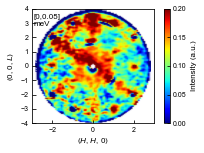

In [173]:
dat_file = r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\NZO_cncs_450mk_consEcut_dE0.00-0.05.txt'
latexify()
for i in np.arange(0,1,1):
    print(dat_file)
    data = np.genfromtxt(dat_file) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]

    # Get the data shape and reshape for plot
    nx = np.int( (x.max()-x.min())/(x[1]-x[0])+1) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])

    # Mask Nan
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure()
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.axis([-3, 3, -4, 4])
    #plt.text(-2.9, 3.2,str(e_label[i])+'\nmeV', ha='left', va='center',
    #         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.text(-2.9, 3.2,'[0,0.05]\nmeV', ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    if i==0 or i==4:
        plt.xlabel('($H$, $H$, 0)')
        plt.ylabel('(0, 0, $L$)')

    plt.xticks(color='k')
    plt.yticks(color='k')
    plt.gca().set_aspect(0.7)
    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity (a.u.)')

    #cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])#, weight='bold')

    fig.savefig(dat_file.replace("txt", "pdf"), bbox_inches="tight",pad_inches=0.0,verbose=True)  
    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True) 

    plt.show()

# Plot constant E cut symmitrized CNCS data

In [9]:
# ２４０　ｍＫ　ａｎｄ　４５０　ｍＫ
# find the files
#https://stackoverflow.com/questions/237079/how-to-get-file-creation-modification-date-times-in-python
import time
timestamp = (2019,2,25,12,0,0,0,1,0)
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace'

fname = 'NZO_cncs_240mK-20K_sym[[]hh0[]][[]00l[]]_constE_[[]hhl[]]_*meV.txt'
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        filepath = os.path.join(fpath,file)
        filetime = time.ctime(os.path.getmtime(filepath))
        #print(filetime)
        #print(os.stat(filepath).st_mtime,os.path.getctime(filepath)) # creat and modified times?
        #print(time.ctime(os.stat(filepath).st_mtime), time.ctim1(os.path.getmtime(filepath)))
        if os.path.getmtime(filepath)> time.mktime(timestamp):# convert to secs and compare
            print(os.path.getmtime(filepath))
            print(file)
            fnames.append(filepath)
            
fname = 'NZO_cncs_450mK-20K_sym[[]hh0[]][[]00l[]]_constE_[[]hhl[]]_*meV.txt'
fnames0 = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        filepath = os.path.join(fpath,file)
        filetime = time.ctime(os.path.getmtime(filepath))
        if os.path.getmtime(filepath)> time.mktime(timestamp):# convert to secs and compare
            print(os.path.getmtime(filepath))
            print(file)
            fnames0.append(filepath)

1551129702.9380722
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[-0.03,0.03]meV.txt
1551129704.7908392
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.00,0.05]meV.txt
1551129706.6896505
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.05,0.10]meV.txt
1551129709.291132
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.10,0.15]meV.txt
1551129711.3781228
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.15,0.20]meV.txt
1551129713.4671152
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.20,0.25]meV.txt
1551129716.0655937
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.25,0.30]meV.txt
1551129717.993433
NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.30,0.35]meV.txt
1551129664.2641823
NZO_cncs_450mK-20K_sym[hh0][00l]_constE_[hhl]_[-0.03,0.03]meV.txt
1551129666.1639948
NZO_cncs_450mK-20K_sym[hh0][00l]_constE_[hhl]_[0.00,0.05]meV.txt
1551129668.0678105
NZO_cncs_450mK-20K_sym[hh0][00l]_constE_[hhl]_[0.05,0.10]meV.txt
1551129670.3139532
NZO_cncs_450mK-20K_sym[hh0][00l]_constE_[hhl]_[0.10,0.15]

In [10]:
# reflecting one quadrant to four: not working
def symm_4(X,Y,Z):
    X = np.hstack([X, -np.fliplr(X)[:,1:]])# because X is negative
    X = np.vstack([X,  np.flipud(X)[1:,:]])
    Y = np.hstack([Y,  np.fliplr(Y)[:,1:]])# because Y is positive
    Y = np.vstack([Y, -np.flipud(Y)[1:,:]])
    Z = np.hstack([Z, np.fliplr(Z)[:,1:]])# because Y is positive
    Z = np.vstack([Z, np.flipud(Z)[1:,:]])
    return X,Y,Z

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


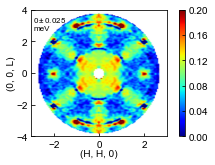

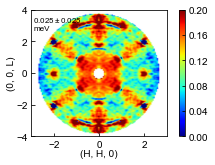

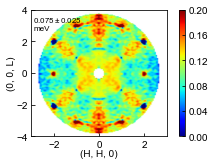

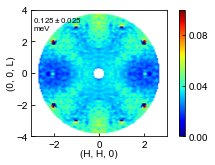

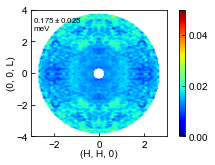

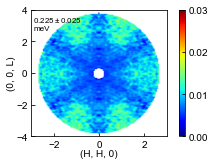

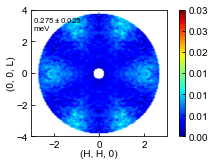

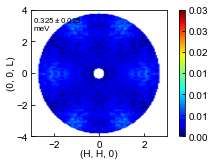

In [6]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ
# Colorbar limits and steps
#240mK
# cb_max  = [0.20,  0.3,  0.3,  0.25,  0.15,  0.04, 0.04, 0.04, 0.04, 0.04, 0.03, 0.02, 0.02]
# cb_st  =  [0.05, 0.05, 0.05,  0.05,  0.03,  0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005,0.002]
# e_label = [0, 0.055, 0.075, 0.105, 0.135, 0.165, 0.195, 0.225, 0.255, 0.285]
# nb_of_files = 10

# cb_max  = [0.20,  0.3,  0.3,  0.15,  0.08,  0.04, 0.04, 0.04, 0.04, 0.04, 0.03, 0.02, 0.02]
# cb_st  =  [0.05, 0.05, 0.05,  0.03,  0.02,  0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005,0.002]
# e_label = ['$0\pm0.025$', '$0.025\pm0.025$', '$0.075\pm0.025$', '$0.125\pm0.025$','$0.175\pm0.025$','$0.225\pm0.025$','$0.275\pm0.025$','$0.325\pm0.025$',]

#450mK
cb_max = [0.18,  0.18,  0.15,  0.3, 0.1,  0.05,  0.03,  0.03, 0.02,  0.02]
cb_st =  [0.03, 0.03, 0.03,  0.05, 0.02, 0.01, 0.005, 0.005, 0.005, 0.005]
e_label = [0, 0.055, 0.075, 0.105, 0.135, 0.165, 0.195, 0.225, 0.255, 0.285]
e_label = ['$0\pm0.05$', '$0.055\pm0.005$', '$0.075\pm0.025$', 0.105, 0.135, 0.165, 0.195, 0.225, 0.255, 0.285]

cb_max = [0.2,  0.2,  0.2,  0.1, 0.05,  0.03,  0.03,  0.03, 0.03]
cb_st  = [0.04, 0.04, 0.04,  0.04, 0.02, 0.01, 0.005, 0.005, 0.005]
e_label = ['$0\pm0.025$', '$0.025\pm0.025$', '$0.075\pm0.025$', '$0.125\pm0.025$','$0.175\pm0.025$','$0.225\pm0.025$','$0.275\pm0.025$','$0.325\pm0.025$',]

nb_of_files = 8
latexify()
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'xtick.labelsize':10,
         'ytick.labelsize':10 }
mpl.rcParams.update(params)

for i in [0,1,2,3,4,5,6,7]:# np.arange(0,nb_of_files,1):
    #print(fnames0[i])
    data = np.genfromtxt(fnames0[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]

    # Get the data shape and reshape for plot
    #print(x.max(),x.min(),x[1]-x[0],(x.max()-x.min()),(x.max()-x.min())/(x[1]-x[0]))
    nx = np.int( np.rint( (x.max()-x.min())/(x[1]-x[0])+1) )
    ny = np.int(len(x)/nx)
    x = np.reshape(x,[ny,nx])[0,:]
    y = np.reshape(y,[ny,nx])[:,0]
    z = z.reshape([ny,nx])
    #print(z.shape)
    # refect the data to four quadrants
    X = np.hstack([x, -np.flip(x)[1:]])# because X is negative
    Y = np.hstack([-np.flip(y)[:-1], y]) # because Y is positive
    Z = np.hstack([z, np.fliplr(z)[:,1:]])
    Z = np.vstack([np.flipud(Z)[1:,:], Z])

    # Mask Nan
    x1, y1 = np.meshgrid(X,Y, indexing='xy')
    rad = np.sqrt(2*x1**2 + y1**2)
    Z[(rad>3.8)|(rad<0.33)] = np.nan # for 30mK
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure()
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.magma
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.axis([-3, 3, -4, 4])
#     plt.text(-2.9, 3.2,str(e_label[i])+'\nmeV', ha='left', va='center',
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.text(-2.9, 3.2, e_label[i]+'\nmeV', ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    #if i==0 or i==4:
    plt.xlabel('(H, H, 0)',labelpad=0)
    plt.ylabel('(0, 0, L)',labelpad=0)

    #plt.minorticks_on()
    
    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    #cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

    #cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])#, weight='bold')
    plt.gca().set_aspect(0.7)
    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",pad_inches=0.0,verbose=True)  
    plt.tight_layout(pad=0.)
    plt.show()

D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\NZO_cncs_240mK-20K_sym[hh0][00l]_constE_[hhl]_[0.00,0.05]meV.txt.pdf


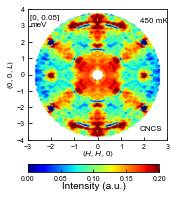

In [22]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ
# Colorbar limits and steps
#240mK
%matplotlib ipympl
%matplotlib inline
cb_max  = [0.20,  0.3,  0.3,  0.15,  0.08,  0.04, 0.04, 0.04, 0.04, 0.04, 0.03, 0.02, 0.02]
cb_st  =  [0.05, 0.05, 0.05,  0.03,  0.02,  0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005,0.002]
e_label = ['$0\pm0.025$', '$0.025\pm0.025$', '$0.075\pm0.025$', '$0.125\pm0.025$','$0.175\pm0.025$','$0.225\pm0.025$','$0.275\pm0.025$','$0.325\pm0.025$',]

#450mK
# cb_max = [0.18,  0.18,  0.15,  0.3, 0.1,  0.05,  0.03,  0.03, 0.02,  0.02]
# cb_st =  [0.03, 0.03, 0.03,  0.05, 0.02, 0.01, 0.005, 0.005, 0.005, 0.005]
# e_label = [0, 0.055, 0.075, 0.105, 0.135, 0.165, 0.195, 0.225, 0.255, 0.285]
# e_label = ['$0\pm0.05$', '$0.055\pm0.005$', '$0.075\pm0.025$', 0.105, 0.135, 0.165, 0.195, 0.225, 0.255, 0.285]

cb_max = [0.2,  0.2,  0.2,  0.1, 0.05,  0.03,  0.03,  0.03, 0.03]
cb_st  = [0.04, 0.05, 0.04,  0.04, 0.02, 0.01, 0.005, 0.005, 0.005]
e_label = ['$0\pm0.025$', '$0.025\pm0.025$', '$0.075\pm0.025$', '$0.125\pm0.025$','$0.175\pm0.025$','$0.225\pm0.025$','$0.275\pm0.025$','$0.325\pm0.025$',]

nb_of_files = 8
latexify()
for i in [1]:# np.arange(0,nb_of_files,1):
    #print(fnames0[i])
    data = np.genfromtxt(fnames0[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]

    # Get the data shape and reshape for plot
    #print(x.max(),x.min(),x[1]-x[0],(x.max()-x.min()),(x.max()-x.min())/(x[1]-x[0]))
    nx = np.int( np.rint( (x.max()-x.min())/(x[1]-x[0])+1) )
    ny = np.int(len(x)/nx)
    x = np.reshape(x,[ny,nx])[0,:]
    y = np.reshape(y,[ny,nx])[:,0]
    z = z.reshape([ny,nx])
    #print(z.shape)
    # refect the data to four quadrants
    X = np.hstack([x, -np.flip(x)[1:]])# because X is negative
    Y = np.hstack([-np.flip(y)[:-1], y]) # because Y is positive
    Z = np.hstack([z, np.fliplr(z)[:,1:]])
    Z = np.vstack([np.flipud(Z)[1:,:], Z])

    # Mask Nan
    x1, y1 = np.meshgrid(X,Y, indexing='xy')
    rad = np.sqrt(2*x1**2 + y1**2)
    Z[(rad>3.8)|(rad<0.33)] = np.nan # for 30mK
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure()
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.magma
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.axis([-3, 3, -4, 4])
#     plt.text(-2.9, 3.2,str(e_label[i])+'\nmeV', ha='left', va='center',
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.text(1.8, -3.3, 'CNCS', ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.text(1.8, 3.3, '450 mK', ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.text(-2.9,  3.3, '[0, 0.05]'+'\nmeV', ha='left', va='center',horizontalalignment='left',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    #if i==0 or i==4:
    plt.xlabel('($H$, $H$, 0)',labelpad=0)
    plt.ylabel('(0, 0, $L$)',labelpad=0)
    plt.gca().set_aspect(0.7)
    #plt.minorticks_on()
    
    # set colorbar and its properties
    #https://matplotlib.org/3.1.0/gallery/axes_grid1/demo_colorbar_with_inset_locator.html
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    axins = inset_axes(plt.gca(),
                   width="94%",  # width = 5% of parent_bbox width
                   height="6%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.25, 1, 1),
                   bbox_transform=plt.gca().transAxes,
                   borderpad=0)
    cb = plt.colorbar(pcol,cax=axins,orientation="horizontal") # label='Intensity', ticks=range(0,100)
    cb.ax.set_xlabel('Intensity (a.u.)',fontsize=10, labelpad=0)

    #cb.ax.tick_params(labelsize=12)
    #cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    #cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])#, weight='bold')
    
    plt.tight_layout(pad=0.)
    if i==1:
        fig.savefig(os.path.join(fpath, fnames[i]+".pdf"), bbox_inches="tight",pad_inches=0.0,verbose=True)
        print(os.path.join(fpath, fnames[i]+".pdf"))
    plt.show()

Text(0.5, 0, 'Intensity (a.u.)')

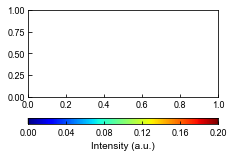

In [6]:
#https://matplotlib.org/3.1.0/gallery/axes_grid1/demo_colorbar_with_axes_divider.html
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
ax1_divider = make_axes_locatable(plt.gca())
cax1 = ax1_divider.append_axes("bottom", size="7%", pad="25%")
cb = colorbar(pcol,cax=cax1,orientation="horizontal") # label='Intensity', ticks=range(0,100)
cb.ax.set_xlabel('Intensity (a.u.)',fontsize=10)

In [188]:
from datetime import datetime, date
date(2019,12,1) - date(2019,9,2)
2*np.arcsin(4./(2*2.4))/3.1415*180

112.88870985248718

In [15]:
# Plot 240mK and 450mK data in one figure
def load_1to4(fname):# load data and expand to four quadrats
    #print(fname)
    data = np.genfromtxt(fname) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]

    # Get the data shape and reshape for plot
    #print(x.max(),x.min(),x[1]-x[0],(x.max()-x.min()),(x.max()-x.min())/(x[1]-x[0]))
    nx = np.int( np.rint( (x.max()-x.min())/(x[1]-x[0])+1) )
    ny = np.int(len(x)/nx)
    x = np.reshape(x,[ny,nx])[0,:]
    y = np.reshape(y,[ny,nx])[:,0]
    z = z.reshape([ny,nx])
    #print(z.shape)
    # refect the data to four quadrants
    X = np.hstack([x, -np.flip(x)[1:]])# because X is negative
    Y = np.hstack([-np.flip(y)[:-1], y]) # because Y is positive
    Z = np.hstack([z, np.fliplr(z)[:,1:]])
    Z = np.vstack([np.flipud(Z)[1:,:], Z])
    return X,Y,Z
def dia_combine(m0,m1,k,b):# combine two halves from two matrix, k and b define the border of a straght line in between
    shape = np.shape(m0)
    if not np.shape(m0)==np.shape(m1):
        raise AssertionError('The shapes of the two arrarys are not equal')
    mask = np.array([True if iy>k*ix+b else False for ix in range(shape[0]) for iy in range(shape[1])]).reshape(shape)
    return np.where(mask,m0,m1)

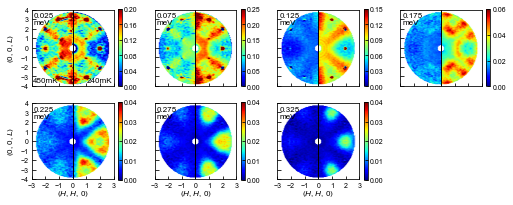

In [20]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ in subplots
%matplotlib inline
cb_max = [0.2,  0.2,  0.25,  0.15, 0.06, 0.04,  0.04,  0.04, 0.04]
cb_st  = [0.04, 0.04, 0.05,  0.03, 0.02, 0.01,  0.01,  0.01, 0.005]
e_label = ['0', '0.025', '0.075', '0.125','0.175','0.225','0.275','0.325']

k = 0.
b = -k*78+55 # 78 and 56 are the shape of the data; to keep the border always passing the center

latexify(fig_width=6.9, fig_height=2.8, columns=2)
fig, axs = plt.subplots(nrows=2, ncols=4)

for idx, i in enumerate([1,2,3,4,5,6,7]):
    if idx<4:
        row=0
    else:
        row=1; idx=idx-4
    # load and combine    
    X, Y, Z0 = load_1to4(fnames[i])
    _, _, Z1 = load_1to4(fnames0[i])
    Z = dia_combine(Z0,Z1,k,b)
    
    # Mask Nan
    x1, y1 = np.meshgrid(X,Y, indexing='xy')
    rad = np.sqrt(2*x1**2 + y1**2)
    Z[(rad>3.8)|(rad<0.33)] = np.nan # for 30mK

    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = axs[row,idx].pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot
    axs[row,idx].axvline(0, ymin=0, ymax=1, lw=1, color='black')
    
    # set the limits of the plot to the limits of the data
    #plt.axis([-3, 3, -4, 4])
    axs[row,idx].set_xticks(range(-3,4))
    axs[row,idx].set_yticks(range(-4,5))
    axs[row,idx].set_aspect(0.7)
    
    axs[row,idx].text(-2.85, 3, e_label[i]+'\nmeV', ha='left', va='center',
                     backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    if row==0 and idx==0:
        axs[row,idx].text(-2.9, -3.4, '450mK', ha='left', va='center',
                         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        axs[row,idx].text( 2.9, -3.4, '240mK', ha='right', va='center',
                         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    cb = fig.colorbar(pcol, ax=axs[row,idx], fraction=0.043, pad=0.05, orientation='vertical', anchor=(0.5,0),panchor=(0.5,1)) # label='Intensity', ticks=range(0,100)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])#, weight='bold')
    cb.ax.yaxis.set_tick_params(pad=2)
    
    if row==1:
        axs[row,idx].set_xlabel('($H$, $H$, 0)',labelpad=0.1)
    else:
        axs[row,idx].get_xaxis().set_ticklabels([])

    if idx==0:
        axs[row,idx].set_ylabel('(0, 0, $L$)')  
    else:
        axs[row,idx].get_yaxis().set_ticklabels([])
            
plt.tight_layout(pad=0.,w_pad=0.0, h_pad=0.0)
fig.delaxes(axs[1,3])
plt.draw()
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\450_240mK_hhl_maps_2.pdf', bbox_inches="tight",pad_inches=0,verbose=True)  
#plt.show()

In [21]:
fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\450_240mK_hhl_maps_2.pdf', bbox_inches="tight",pad_inches=0,verbose=True) 

# Plot SpinWave calculated by Matlab

## Single plots

0 3


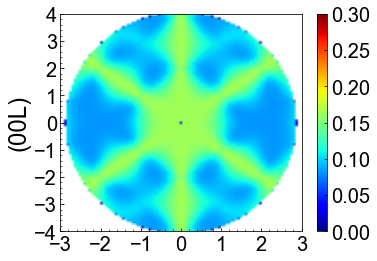

5 8


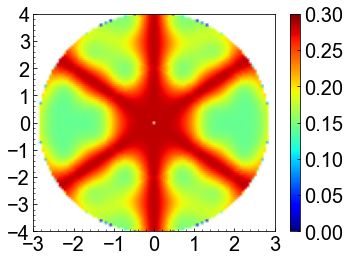

10 13


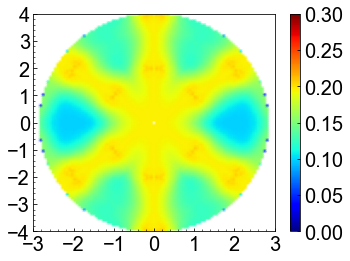

15 18


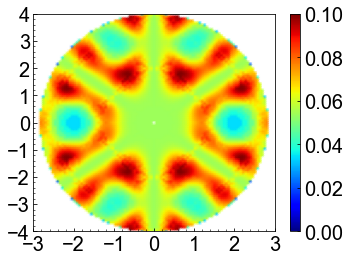

20 23


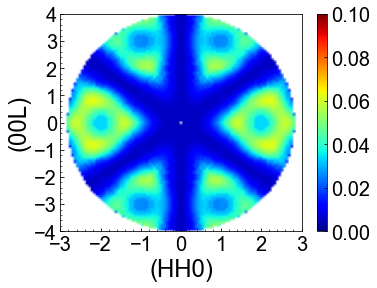

25 28


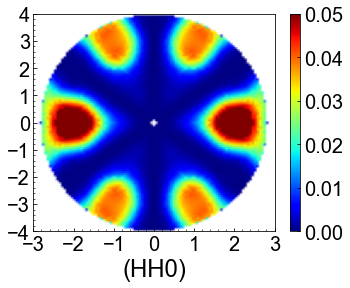

30 33


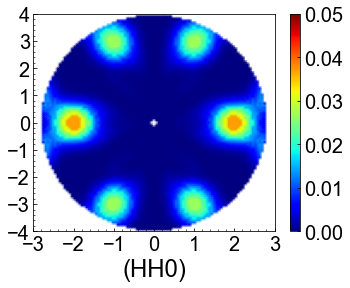

35 38


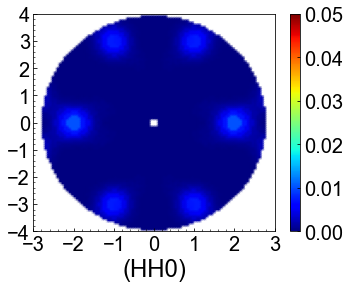

In [23]:
# Ｐｌｏｔ　ｔｈｅ　ｓｐｉｎ　ｗａｖｅ　ｏｆ　Ｎｄ２Ｚｒ２Ｏ７　ａｎｄ　ｔｈｅ　ｄａｔａ　ｉｓ　ｆｒｏｍ　Ｍａｔｌａｂ

#Load the file: every row for a energy (43 row [0,0.42]meV),every col (101*101) is a Q on Grid(X[3,3],Y[3,3])
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\nzo_spinw.txt'
data = np.genfromtxt(fpath) # data is nE by nQ*nQ

#Reshape data for plot
nQ = 101;
nE = 43;
x = np.linspace(-3,3,nQ,endpoint=True)
y = np.linspace(-4,4,nQ,endpoint=True)
X, Y = np.meshgrid(x, y)
#print X,'\n', Y, data.shape

Z = np.reshape(data,(nE,nQ,nQ))
z_min, z_max = np.nanmin(Z), np.nanmax(Z)
Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
#print Zm.shape

erange=np.array([0,0.03,0.05,0.08,0.1,0.13,0.15,0.18,0.2,0.23,0.25,0.28,0.30,0.33,0.35,0.38]) #energy integrate ranges
idx=np.rint(erange/0.01).astype(int)

# Colorbar limits and steps
cb_max = [0.3,  0.3,  0.3,  0.1,  0.1,  0.05, 0.05,  0.05]
cb_st =  [0.05, 0.05, 0.05, 0.02, 0.02, 0.01, 0.01, 0.01]
nomalC=700000 # normalize it to use the experiment scale
%matplotlib inline
nb_of_files = 8
for i in np.arange(0,nb_of_files,1):
    fig = plt.figure(figsize=(5.4,4))
    print(idx[i*2],idx[i*2+1])
    sumZ = Zm[idx[i*2]:idx[i*2+1]+1,:,:].sum(0)
    # pcolormesh actually draws individual rectangles which contains white lines
    cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y,sumZ/nomalC, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    #plt.axis([x.min(), x.max(), y.min(), y.max()])
    #plt.axis([-3, 3, -3, 3])
    if i>=4:
        plt.xlabel('(HH0)',size=24)
    if i==0 or i==4:
        plt.ylabel('(00L)',size=24)

    plt.minorticks_on()
    plt.xticks(color='k', size=20)
    plt.yticks(color='k', size=20)

    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    #cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

    #cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=20)#, weight='bold')

    #fig.savefig(fnames[i].replace(".txt", "simu.pdf"), bbox_inches="tight",verbose=True)  
    #fig.savefig(fnames[i].replace(".txt", "simu.pdf"), bbox_inches="tight", pad_inches=0,verbose=True)  
    #fig.savefig(fnames[i].replace(".txt", "simu.pdf"), bbox_inches=mpl.transforms.Bbox([[-0.05,0],[1.05,1]]),verbose=True)  

    plt.show()

## Merge horizontally and vertically symmetrized 240 data and Matlab calculation

(101, 101) (43, 101, 101)


FigureCanvasNbAgg()

0 3


FigureCanvasNbAgg()

5 8


FigureCanvasNbAgg()

10 13


FigureCanvasNbAgg()

15 18


FigureCanvasNbAgg()

20 23


FigureCanvasNbAgg()

25 28


FigureCanvasNbAgg()

30 33


FigureCanvasNbAgg()

35 38


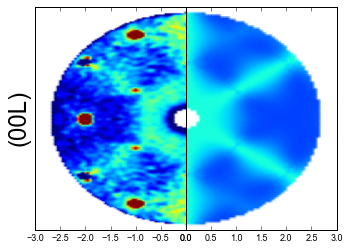

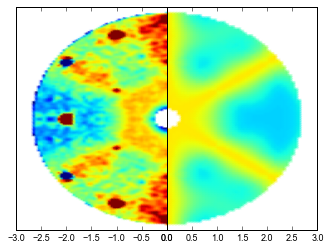

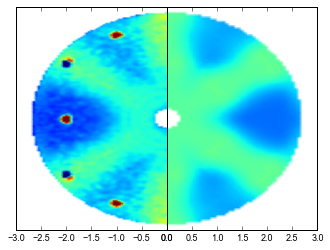

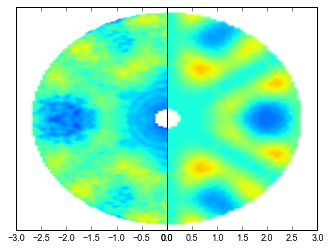

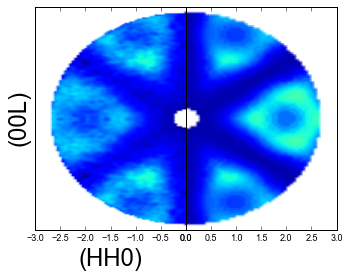

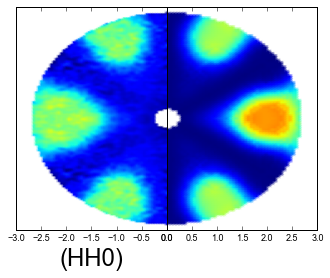

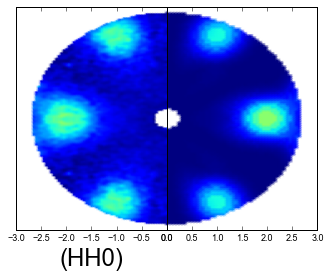

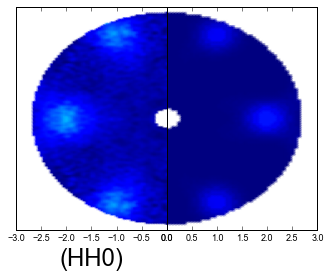

In [72]:
# Combine half data /half sumu Horizontally

# The data files are "fnames240sym"
# Load the calculation file: every row for a energy (43 row [0,0.42]meV),every col (101*101) is a Q on Grid(X[3,3],Y[3,3])
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\nzo_spinw.txt'
data = np.genfromtxt(fpath) # data is nE by nQ*nQ

#Reshape for plot
nQ = 101;
nE = 43;
x = np.linspace(-3,3,nQ,endpoint=True)
y = np.linspace(-4,4,nQ,endpoint=True)
XX, YY = np.meshgrid(x, y)

Z = np.reshape(data,(nE,nQ,nQ))
z_min, z_max = np.nanmin(Z), np.nanmax(Z)

rad = np.sqrt(2*XX**2 + YY**2); print(rad.shape, Z.shape)
rad=np.broadcast_arrays(rad[np.newaxis,:,:],Z)[0]
Zmm = np.ma.masked_where((rad>3.8)|(rad<0.35),Z)# mask Nan values then plot in white color
#### Zmm = np.ma.masked_where((rad>3.8)|(rad<0.33)[np.newaxis,:,:],Z)# Not working!!!: https://stackoverflow.com/questions/21295788/numpy-broadcasting-rules-when-using-masked-where-or-do-they-not-apply

erange=np.array([0,0.03,0.05,0.08,0.1,0.13,0.15,0.18,0.2,0.23,0.25,0.28,0.30,0.33,0.35,0.38]) #energy integrate ranges
idx=np.rint(erange/0.01).astype(int)

# Colorbar limits and steps
cb_max  = [0.3,  0.3,  0.3,  0.1,  0.1,  0.05, 0.05,  0.05]
cb_st   = [0.05, 0.05, 0.05, 0.02, 0.02, 0.01, 0.01, 0.01]
e_label = [0.015, 0.065, 0.115, 0.165, 0.215, 0.265, 0.315, 0.365]

nomalC=1000000 # normalize it to use the experiment scale

cmap = plt.cm.jet
cmap.set_bad('w',1.)

nb_of_files = 8
for i in np.arange(0,nb_of_files,1):
    fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(5.4,4),sharey=True)
    fig.subplots_adjust(wspace=0)
    
    # data
    X, Y, Z = load_1to4(fnames240sym[i])
    x1, y1 = np.meshgrid(X,Y, indexing='xy')
    rad = np.sqrt(2*x1**2 + y1**2)
    Z[(rad>3.8)|(rad<0.33)] = np.nan # for 30mK
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    pcol = axs[0].pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot
    axs[0].set_xlim([-3,0])
    
    if i>=4:
        axs[0].set_xlabel('(HH0)',size=24)
    if i==0 or i==4:
        axs[0].set_ylabel('(00L)',size=24)
    
    # simulation
    print(idx[i*2],idx[i*2+1])
    sumZ = Zmm[idx[i*2]:idx[i*2+1]+1,:,:].sum(0)

    pcol = axs[1].pcolormesh(XX,YY,sumZ/nomalC, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face')
    axs[1].set_xlim([0,3])
    axs[1].set_yticks([])

    plt.show()

(101, 101) (43, 101, 101)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


FigureCanvasNbAgg()

0 3


FigureCanvasNbAgg()

5 8


FigureCanvasNbAgg()

10 13


FigureCanvasNbAgg()

15 18


FigureCanvasNbAgg()

20 23


FigureCanvasNbAgg()

25 28


FigureCanvasNbAgg()

30 33


FigureCanvasNbAgg()

35 38


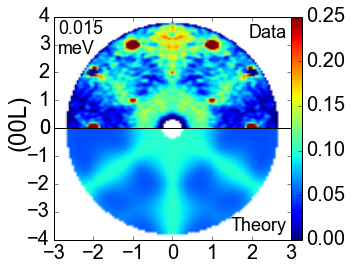

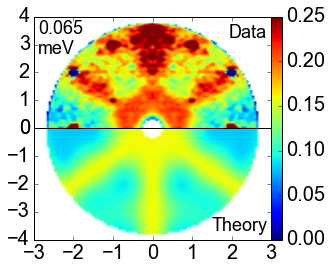

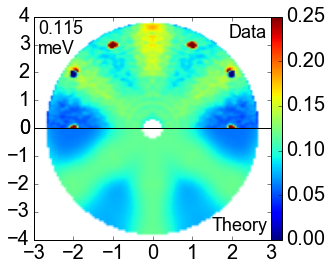

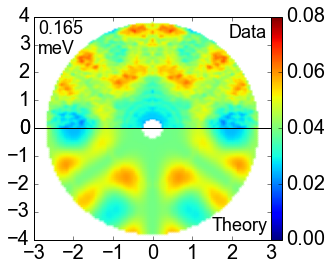

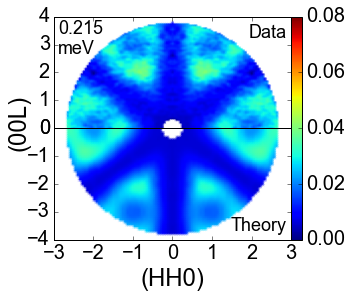

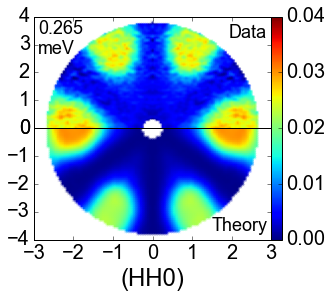

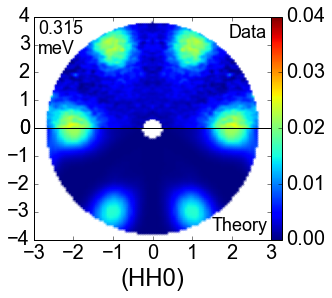

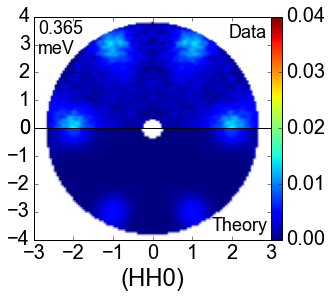

In [128]:
# Vertically combine half data /half sumu

# The data files are "fnames240sym"

# Load the calculation file: every row for a energy (43 row [0,0.42]meV),every col (101*101) is a Q on Grid(X[3,3],Y[3,3])
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\nzo_spinw_res0p13.txt'
data = np.genfromtxt(fpath) # data is nE by nQ*nQ

#Reshape for plot
nQ = 101;
nE = 43;
x = np.linspace(-3,3,nQ,endpoint=True)
y = np.linspace(-4,4,nQ,endpoint=True)
XX, YY = np.meshgrid(x, y)
#print X,'\n', Y, data.shape

Z = np.reshape(data,(nE,nQ,nQ))
z_min, z_max = np.nanmin(Z), np.nanmax(Z)
Z = myGfilter(Z, [0,1.2,0.5])

rad = np.sqrt(2*XX**2 + YY**2); print(rad.shape, Z.shape)
rad=np.broadcast_arrays(rad[np.newaxis,:,:],Z)[0]
Zmm = np.ma.masked_where((rad>3.8)|(rad<0.35),Z)# mask Nan values then plot in white color
#### Zmm = np.ma.masked_where((rad>3.8)|(rad<0.33)[np.newaxis,:,:],Z)# Not working!!!: https://stackoverflow.com/questions/21295788/numpy-broadcasting-rules-when-using-masked-where-or-do-they-not-apply

erange=np.array([0,0.03,0.05,0.08,0.1,0.13,0.15,0.18,0.2,0.23,0.25,0.28,0.30,0.33,0.35,0.38]) #energy integrate ranges
idx=np.rint(erange/0.01).astype(int)

# Colorbar limits and steps
cb_max  = [0.25,  0.25,  0.25,  0.08,  0.08,  0.04, 0.04,  0.04]
cb_st   = [0.05, 0.05, 0.05, 0.02, 0.02, 0.01, 0.01, 0.01]
e_label = [0.015, 0.065, 0.115, 0.165, 0.215, 0.265, 0.315, 0.365]

nomalC=1050000 # normalize it to use the experiment scale

cmap = plt.cm.jet
cmap.set_bad('w',1.)

nb_of_files = 8
for i in np.arange(0,nb_of_files,1):
    fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(5.,4),sharex=True)
    fig.subplots_adjust(hspace=0)
    
    # data
    X, Y, Z = load_1to4(fnames240sym[i])
    x1, y1 = np.meshgrid(X,Y, indexing='xy')
    rad = np.sqrt(2*x1**2 + y1**2)
    Z[(rad>3.8)|(rad<0.33)] = np.nan
    Zm = np.ma.masked_where(np.isnan(Z),Z) # mask Nan values then plot in white color
    
    pcol = axs[0].pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot
    axs[0].set_ylim([0,4])
    axs[0].set_xticks([])
    axs[0].set_yticks(range(0,5))
    
    if i>=4:
        axs[1].set_xlabel('(HH0)',size=24)
    if i==0 or i==4:
        axs[0].set_ylabel('(00L)',size=24)
        axs[0].yaxis.set_label_coords(-0.1, 0.05) 
    
    # simulation
    print(idx[i*2],idx[i*2+1])
    sumZ = Zmm[idx[i*2]:idx[i*2+1]+1,:,:].sum(0)

    pcol = axs[1].pcolormesh(XX,YY,sumZ/nomalC, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') 
    axs[1].set_xticks(range(-3,4))
    axs[1].set_ylim([-4,0])
    axs[1].set_yticks(range(-4,1))
    
    axs[0].tick_params(bottom=False,axis='both', which='major', labelsize=20)
    axs[1].tick_params(top=False,   axis='both', which='major', labelsize=20)

    # set colorbar and its properties
    cb = plt.colorbar(pcol,ax=axs, aspect=20,pad=0.0,orientation="vertical") # label='Intensity', ticks=range(0,100)
    #cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

    cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=20)#, weight='bold')

    axs[0].text(-2.9, 3.2,str(e_label[i])+'\nmeV',size=18, ha='left', va='center',
                backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    if True:
        axs[0].text(2.9, 3.4, 'Data', ha='right', va='center',size=18,
                         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        axs[1].text(2.9,-3.5, 'Theory', ha='right', va='center',size=18,
                         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    fig.savefig(fnames240sym[i].replace(".txt", "_simu.pdf"), bbox_inches="tight", pad_inches=0,verbose=True)  

    plt.show()

# Mont Carlo: $\chi$, $C_p$, histgram $\tau_{x,y,z}(T)$, $1/4\sum_{tetra}\tau_{x,y,z}$, neutron S(q)

## With real Hamiltonian of Nd$_2$Zr$_2$O$_7$

In [2]:
%matplotlib ipympl
%matplotlib ipympl

In [4]:
## Original sequential MC struct: [0.01:0.02:0.49]K 
## temperature step is 0.02!!!
import scipy.io as sio

fpath = r'D:\5_Neutron_Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab'
mc_cal = sio.loadmat(os.path.join(fpath,'mc_state_0p01-0p49k_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_0p02kStep.mat'))

#print(mc_cal)

# Assign fields to varibles of the same names (For the original MC struct)
vals = mc_cal['stat'][0,0]
keys = mc_cal['stat'][0,0].dtype.descr
print(keys)

print(keys[1][0])
print(mc_cal['stat'][0,0]['Cp'])
print(mc_cal['stat'][0,0]['param'][0,0].dtype.descr)

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i][0]
    if key in ['Cp','stdm','mChi','sumTetra','MlocAbs','MhistCounts','MhistCenters','sumTetraHistCounts','sumTetraHistCenters']:
        val = np.squeeze(vals[key])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
        exec(key + '=val')
        print(key)
        key
Ts = mc_cal['stat'][0,0]['param'][0,0]['x'][0,:] 
print(Ts)

[('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O'), ('obj', '|O'), ('state', '|O'), ('param', '|O')]
stdm
[[ 8.3417484   8.63556232  8.68066716  9.1708923   9.90829359 10.88291497
  12.10796593 14.76138359 18.2649846  12.35176369  4.38274915  3.34593451
   2.71573811  2.32122614  2.07174149  1.78095625  1.5470986   1.36729281
   1.25692342  1.13036697  1.0653982   0.95949796  0.86669518  0.81420291
   0.76474992]]
[('initT', '|O'), ('endT', '|O'), ('cool', '|O'), ('nMC', '|O'), ('nStat', '|O'), ('verbosity', '|O'), ('spinDim', '|O'), ('nORel', '|O'), ('nExt', '|O'), ('subLat', '|O'), ('fStat', '|O'), ('fSub', '|O'), ('random', '|O'), ('title', '|O'), ('fineT', '|O'), ('rate', '|O'), ('boundary', '|O'), ('x', '|O'), ('func', '|O'), ('saveObj', '|O'), ('fann', '|O'), ('coneAngle', '|O'

In [10]:
# New sequential MC [0.01:0.01:0.5]K file containning only the varibles needed
# use sequential MC to avoid switching between AIAO domains
## temperature step is 0.01!!!

dat = sio.loadmat(os.path.join(fpath,r'mc_state_0p5-0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_0p01kStep_less.mat'))

vals = dat[list(dat.keys())[3]][0,0]
keys = dat[list(dat.keys())[3]][0,0].dtype.descr
print(keys)

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i][0]
    if key in ['Cp','stdm','mChi','sumTetra','MlocAbs','MhistCounts','MhistCenters','sumTetraHistCounts','sumTetraHistCenters']:
        val = np.squeeze(vals[key])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
        exec(key+'=val')
Ts = np.squeeze(vals['x']) # new small mat files   
print(Ts)

[('x', '|O'), ('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O')]
[0.5  0.49 0.48 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37
 0.36 0.35 0.34 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23
 0.22 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09
 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01]


### Plot chi(T) and Cp(T)

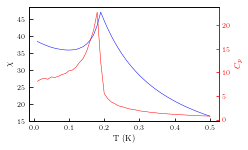

In [11]:
%matplotlib inline
from latexify import latexify
latexify()
mpl.rcParams['text.usetex'] = True

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey='row')

ax1.plot(Ts,mChi[0,:],c='b',label=r'$\chi$',lw=0.5)
ax1.set_xlabel('T (K)')
ax1.set_ylabel(r'$\chi$')

ax2 = ax1.twinx()
ax2.plot(Ts,Cp,c='r', label=r'$C_text{p}$',lw=0.5)
ax2.set_ylabel(r'$C_p$', color='r')
ax2.yaxis.label.set_color('r')
ax2.spines["right"].set_edgecolor('r')
ax2.tick_params('y', colors='r')
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_chi_cp.pdf', bbox_inches="tight", pad_inches=0,verbose=True)

plt.show()

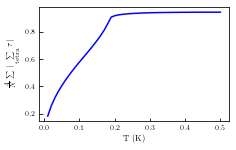

In [13]:
# Plot sum |\sum_{tetra} \tau(global)|
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey='row')
ax1.plot(Ts,sumTetra,c='b',label=r'sum')
ax1.set_xlabel('T (K)')
ax1.set_ylabel(r'$\frac{4}{N}\sum\,|\sum\limits_\mathrm{tetra}\tau|$')
plt.show()

In [14]:
print(MlocAbs.shape, np.average(MlocAbs,1).shape)

(3, 3456, 50) (3, 50)


(3, 50)


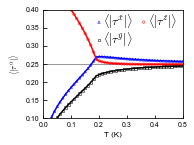

In [15]:
# Plot average(|tau_{x,y,z}|)
latexify(columns=1)
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

# Insert 0 K point
Ts_0    = np.insert(Ts, 0, 0)
print(np.average(MlocAbs,1).shape)
Mloc_av = np.hstack([np.array([0,0,0.5]).reshape([3,1]), np.average(MlocAbs,1)])

# No insert the 0 K
Ts_0    = Ts
Mloc_av = np.average(MlocAbs,1)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(2.5,2.))
ax.scatter(Ts_0,Mloc_av[0,:],c='none',edgecolors='b',marker='^',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{x}|\rightangle$');ax.plot(Ts_0,Mloc_av[0,:],c='b')
ax.scatter(Ts_0,Mloc_av[1,:],c='none',edgecolors='k',marker='s',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{y}|\rightangle$');ax.plot(Ts_0,Mloc_av[1,:],c='k')
ax.scatter(Ts_0,Mloc_av[2,:],c='none',edgecolors='r',marker='o',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{z}|\rightangle$');ax.plot(Ts_0,Mloc_av[2,:],c='r')
ax.axhline(y=0.25,c='grey',lw=0.8,zorder=0)
ax.set_xlim([0,0.5])
ax.set_ylim([0.1,0.4])
ax.set_xlabel('T (K)')
ax.set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$')
ax.legend(frameon=False,ncol=2,fontsize=12,handlelength=1.5,handletextpad=-0.4,columnspacing=0.1,labelspacing=0,loc=(0.3,0.6))
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_mloc_xyz_av.pdf', bbox_inches="tight", pad_inches=0,verbose=True)

plt.show()

In [16]:
#fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey='row')
print(MlocAbs.shape)
# ax1.plot(Ts,MlocAbs.T,label=r'$\chi$')
# ax1.set_xlabel('T (K)')
# ax1.set_ylabel(r'$\frac{4}{N}\sum\,|\sum_{tetra}\tau|$')
# plt.show()
print(MhistCenters.shape,MhistCounts.shape)

(3, 3456, 50)
(101,) (101, 3, 50)


### Plot histgrams for $\tau^\tilde{xyz}$'

(101, 3, 50)


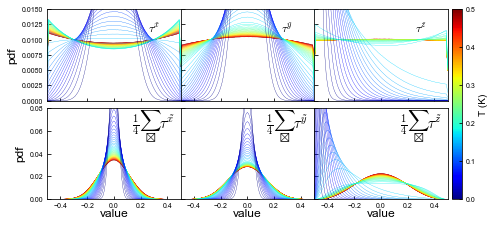

In [17]:
latexify(fig_height=3.,columns=2)

# This change all to external latex fonts~!!!
#https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble'] = [
#        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
#        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#        r'\usepackage{sans}',    # set the normal font here
#        r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#        r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
# ]  
# texts = [[r'$\tau_x$', r'$\tau_y$', r'$\tau_z$'],
#          [r'$\frac{1}{4}\sum\limits_\mathrm{tetra.}\tau_x$', 
#           r'$\frac{1}{4}\sum\limits_\mathrm{tetra.}\tau_y$', 
#           r'$\frac{1}{4}\sum\limits_\mathrm{tetra.}\tau_z$']]# "\limits" force limits to be below and above
    
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

lablefs = 12

fig, axs = plt.subplots(nrows=2, ncols=3,sharex=True,sharey='row')

#colors = mpl.cm.magma_r(np.linspace(0,1,49,endpoint=True))
colors = mpl.cm.jet_r(np.linspace(0,1,49,endpoint=True))

texts = [[r'$\tau^\tilde{x}$', r'$\tau^\tilde{y}$', r'$\tau^\tilde{z}$'],
         [r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{x}$', 
          r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{y}$', 
          r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{z}$']]
print(MhistCounts.shape)
for i in range(0,3):
    for j in range(0,49,1):
        axs[0,i].plot(MhistCenters, MhistCounts[:,i,j]/3456,c=colors[j],lw=0.3)
    axs[0,i].text(0.8,0.8, texts[0][i], size=12, transform=axs[0,i].transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
    for j in range(0,49,1):
        axs[1,i].plot(sumTetraHistCenters,sumTetraHistCounts[:,i,j]/1728,c=colors[j],lw=0.3)

    axs[1,i].text(0.8,0.8, texts[1][i], size=15, transform=axs[1,i].transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
    axs[1,i].set_xticks(np.arange(-0.6, 0.6, step=0.2))
    axs[1,i].set_xlim([-0.5,0.5])
    axs[0,0].set_ylim([0,0.015])
    axs[1,0].set_ylim([0,0.08])
    
# colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=0.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig.subplots_adjust(bottom=0.1, top=0.98, left=0.09, right=1.05, wspace=0.0, hspace=0.08)
cb = plt.colorbar(cmap, ax=axs.flat,pad=0.01)
cb.set_ticks([x for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_ylabel('T (K)',size=lablefs-2)

axs[1,0].set_xlabel(r'value',size=lablefs,labelpad=0)
axs[1,1].set_xlabel(r'value',size=lablefs,labelpad=0)
axs[1,2].set_xlabel(r'value',size=lablefs,labelpad=0)
axs[0,0].set_ylabel('pdf',size=lablefs,labelpad=5)
axs[1,0].set_ylabel('pdf',size=lablefs,labelpad=5)
#plt.tight_layout(pad=0.,w_pad=0, h_pad=0)

#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_tau_hist.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

24323.7635755918 14320.4799806057


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


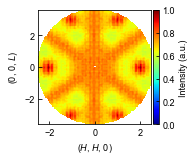

In [18]:
# Neutron scttering [HHL] plane
%matplotlib inline
latexify()
nQ1 =51; nQ2 = 81;
x = np.linspace(-2.5,2.5, 2*nQ1-1,endpoint=True)
y = np.linspace(-4.0,4.0, 2*nQ2-1,endpoint=True)
X, Y = np.meshgrid(x,y)
rad = np.sqrt(2*X**2 + Y**2)

z = np.genfromtxt(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_0p25k_neutron.txt',skip_header=4)
Z = np.reshape(z,[nQ2,nQ1])
print(np.nanmax(Z),np.nanmin(Z))
temp = np.hstack([np.fliplr(Z[:,:-1]), Z])
Z    = np.vstack([np.flipud(temp[:-1,:]), temp])

Z = myGfilter(Z, sigma=0.0, order=0) 
Z[(rad>3.6)|(rad<0.1)] = np.nan
Zm = np.ma.masked_where(np.isnan(Z),Z) # mask Nan values then plot in white color

fig, ax = plt.subplots()
pcol = ax.pcolormesh(X,Y,Z/np.nanmax(Z),vmin=0.0,vmax=1, cmap='jet',linewidth=0,rasterized=True) 
#pcol = ax.pcolormesh(X,Y,Z,vmin=0.0, cmap='jet',linewidth=0,rasterized=True) 
pcol.set_edgecolor('face') 
ax.set_aspect(0.7)
ax.set_xlabel('($H$, $H$, 0)',fontsize=9)
ax.set_ylabel('(0, 0, $L$)',fontsize=9)
ax.set_ylim([-3.6,3.6])
ax.tick_params(axis='both', which='major', labelsize=9)
cb = plt.colorbar(pcol,pad=0.01)
cb.set_ticks([x for x in np.arange(0, 1.2, 0.2)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 1.2, 0.2)],fontsize=9)
cb.ax.set_ylabel('Intensity (a.u.)',fontsize=9)

#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_scatter.pdf', bbox_inches="tight", pad_inches=0,verbose=True)

plt.show()

In [97]:
16*8*8*8*0.6667*0.75*5

20481.023999999998

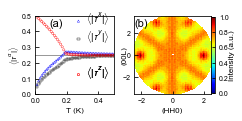

In [19]:
# Two pannels: average(|tau_{x,y,z}|) and neutron scttering [HHL] plane
%matplotlib inline
# latexify()
# mathtextFontset = ['cm','stix', 'stixsans']
# mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(3.4,1.7),gridspec_kw = {'width_ratios':[0.86, 1]})
ax[0].set_aspect(1)
ax[0].scatter(Ts_0,Mloc_av[0,:],c='none',edgecolors='b',marker='^',s=5,lw=0.4, label=r'$\leftangle|\tau^x|\rightangle$')
ax[0].scatter(Ts_0,Mloc_av[1,:],c='none',edgecolors='k',marker='s',s=5,lw=0.4, label=r'$\leftangle|\tau^y|\rightangle$')
ax[0].scatter(Ts_0,Mloc_av[2,:],c='none',edgecolors='r',marker='o',s=5,lw=0.4, label=r'$\leftangle|\tau^z|\rightangle$')
ax[0].axhline(y=0.25,c='grey',lw=0.8,zorder=0)
ax[0].text(0.35, 0.9, '(a)', ha='right', va='center',size=11, transform=ax[0].transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
ax[0].set_xlim([0,0.5])
ax[0].set_ylim([0,0.5])
ax[0].set_xlabel('T (K)')
ax[0].set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$',labelpad=0)
handles, labels = ax[0].get_legend_handles_labels()
leg1 = ax[0].legend(handles[0:2],labels[0:2],frameon=False,ncol=1,fontsize=10,
             handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.4,0.55))
leg2 = ax[0].legend(handles[2:],labels[2:],frameon=False,ncol=1,fontsize=10,
                    handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.4,0.1))
ax[0].add_artist(leg1)
ax[0].add_artist(leg2)

pcol = ax[1].pcolormesh(X,Y,Z/np.nanmax(Z),vmin=0.0,vmax=1, cmap='jet',linewidth=0,rasterized=True) 
pcol.set_edgecolor('face') 
ax[1].text(0.18, 0.9, '(b)', ha='right', va='center',size=11, transform=ax[1].transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
ax[1].set_aspect(0.7)
ax[1].set_xlabel('(HH0)')
ax[1].set_ylabel('(00L)', labelpad=-5)
ax[1].set_ylim([-3.6,3.6])

cb = plt.colorbar(pcol,pad=0.,shrink=0.83)
cb.set_ticks([x for x in np.arange(0, 1.2, 0.2)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 1.2, 0.2)])
cb.ax.set_ylabel('Intensity (a.u.)',labelpad=0.02)


fig.subplots_adjust( wspace=0.23)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_mloc_scatter.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

### Four pannels: $|\tau^\tilde{\alpha}|$, neutron, histgrams for $\tau^\tilde{x}$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


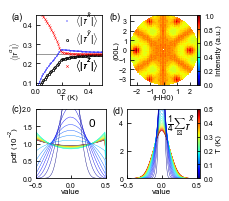

In [44]:
latexify()
# mathtextFontset = ['cm','stix', 'stixsans']
# mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 
#fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(3.4,4),gridspec_kw = {'width_ratios':[0.86, 1]})

# def colorbar(mappable):
#     ax = mappable.axes
#     fig = ax.figure
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     return fig.colorbar(mappable, cax=cax)

mathtextFontset = ['cm','stix', 'stixsans']
#mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 
fs = 8
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7 }
mpl.rcParams.update(params)

# To change default colormap
#plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

fig = plt.figure(figsize=(3.4,3))# if constraned=True then, hspace and wsapce not working

gs0 = fig.add_gridspec(2, 1, height_ratios=[1,1],hspace=0.35)

gs00 = gs0[0].subgridspec(1, 2, width_ratios=[1, 1],wspace=0.43)
gs01 = gs0[1].subgridspec(1, 2, width_ratios=[1, 1],wspace=0.3)

##### (a)
ax00 = fig.add_subplot(gs00[0])
#ax00.set_aspect(1)
ax00.scatter(Ts_0,Mloc_av[0,:],marker='+',s=6,lw=0.3,c='b', label=r'$\leftangle|\tau^\tilde{x}|\rightangle$')
ax00.scatter(Ts_0,Mloc_av[1,:],marker='$\u25EF$',s=6,lw=0.3,c='black', label=r'$\leftangle|\tau^\tilde{y}|\rightangle$')# unfilled circle
ax00.scatter(Ts_0,Mloc_av[2,:],marker='x',s=6,lw=0.3,c='r', label=r'$\leftangle|\tau^\tilde{z}|\rightangle$')
ax00.plot(Ts_0,Mloc_av[0,:],lw=0.5,c='b')
ax00.plot(Ts_0,Mloc_av[1,:],lw=0.5,c='black')
ax00.plot(Ts_0,Mloc_av[2,:],lw=0.5,c='r')

ax00.axhline(y=0.25,c='grey',lw=0.8,zorder=0)
ax00.text(-0.20, 0.98, '(a)', ha='right', va='center',size=9, transform=ax00.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
ax00.set_xlim([0,0.5])
ax00.set_ylim([0.09,0.45])
#ax00.xaxis.set_ticks([0,0.1,0.2,0.3,0.4,0.5])
ax00.yaxis.set_ticks([0.1,0.2,0.3,0.4])
ax00.set_xlabel('T (K)',labelpad=0)
ax00.set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$',labelpad=-1)
handles, labels = ax00.get_legend_handles_labels()
leg1 = ax00.legend(handles[0:2],labels[0:2],frameon=False,ncol=1,fontsize=10,
             handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.3,0.48))
leg2 = ax00.legend(handles[2:],labels[2:],frameon=False,ncol=1,fontsize=10,
                    handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.3,0.1))
ax00.add_artist(leg1)
ax00.add_artist(leg2)

##### (b)
ax01 = fig.add_subplot(gs00[1])
pcol = ax01.pcolormesh(X,Y,Z/np.nanmax(Z),vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True) 
pcol.set_edgecolor('face') 
ax01.text(-0.15, 0.98, '(b)', ha='right', va='center',size=9, transform=ax01.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#ax01.set_aspect(0.7)
ax01.set_xlabel('(HH0)',labelpad=0,size=fs)
ax01.set_ylabel('(00L)', labelpad=-1,size=fs)
ax01.set_ylim([-3.6,3.6])
ax01.yaxis.set_ticks(np.arange(-3, 4, 1))
ax01.xaxis.set_ticks(np.arange(-2, 3, 1))

cb = plt.colorbar(pcol,ax=[ax00,ax01],pad=0.,shrink=1)
cb.set_ticks([x for x in np.arange(0, 1.2, 0.2)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 1.2, 0.2)])
cb.ax.set_ylabel('Intensity (a.u.)',labelpad=2)

##### (c)
ax10 = fig.add_subplot(gs01[0])
ax10.text(-0.20, 1, '(c)', ha='right', va='center',size=9, transform=ax10.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
for j in range(0,50,2):
    ax10.plot(MhistCenters,MhistCounts[:,0,j]/3456*100,c=colors[j],lw=0.4)
ax10.text(0.8,0.8, texts[0][0], size=12, transform=ax10.transAxes,ha='center', va='center', 
          backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
ax10.set_xticks(np.arange(-0.5, 1.0, step=0.5))
ax10.set_xlim([-0.5,0.5])
ax10.set_ylim([0,0.02*100])
ax10.set_xlabel(r'value',labelpad=0)
ax10.set_ylabel('pdf ($10^{-2}$)',labelpad=0)

##### (d)
ax11 = fig.add_subplot(gs01[1])
ax11.text(-0.05, 0.98, '(d)', ha='right', va='center',size=9, transform=ax11.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
for j in range(0,50,2):
    ax11.plot(sumTetraHistCenters,sumTetraHistCounts[:,0,j]/1728*100,c=colors[j],lw=0.4)
ax11.text(0.62,0.8, r'$\frac{1}{4}$', size=12, transform=ax11.transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
ax11.text(0.75,0.75, r'$\sum_\boxtimes$', size=8, transform=ax11.transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
ax11.text(0.9,0.8, r'$\tau^\tilde{x}$', size=12, transform=ax11.transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
ax11.set_xlabel(r'value',labelpad=0)
ax11.set_xlim([-0.5,0.5])
ax11.set_ylim([0,0.05*100])

# colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=0.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

#fig.subplots_adjust(bottom=0.1, top=0.98, left=0.09, right=1.05, wspace=0.0, hspace=0.08)
cb = plt.colorbar(cmap, ax=[ax10,ax11],pad=0.00)
cb.set_ticks([x for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_ylabel('T (K)',labelpad=2)

#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_4p.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

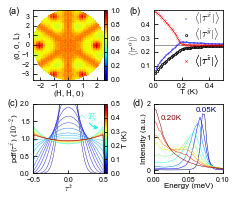

In [167]:
# With MC_dyn gap as pannel d (First run cell MC dynamics!!!)
%matplotlib ipympl
%matplotlib qt
latexify()

mathtextFontset = ['cm','stix', 'stixsans']

fs = 8
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7 }
mpl.rcParams.update(params)

# To change default colormap
#plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

fig = plt.figure(figsize=(3.4,3))# if constraned=True then, hspace and wsapce not working

gs0 = fig.add_gridspec(2, 1, height_ratios=[1,1],hspace=0.35)

gs00 = gs0[0].subgridspec(1, 2, width_ratios=[1.2, 1],wspace=0.5)
gs01 = gs0[1].subgridspec(1, 2, width_ratios=[1.2, 1],wspace=0.5)

##### (a)
ax = fig.add_subplot(gs00[0])
pcol = ax.pcolormesh(X,Y,Z/np.nanmax(Z),vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True) 
pcol.set_edgecolor('face') 
ax.text(-0.2, 0.98, '(a)', ha='right', va='center',size=9, transform=ax.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#ax.set_aspect(0.7)
ax.set_xlabel('($\mathsf{H}$, $\mathsf{H}$, 0)',labelpad=0,size=fs)
ax.set_ylabel('(0, 0, $\mathsf{L}$)', labelpad=-1,size=fs)
ax.set_ylim([-3.6,3.6])
ax.yaxis.set_ticks(np.arange(-3, 4, 1))
ax.xaxis.set_ticks(np.arange(-2, 3, 1))

cb = plt.colorbar(pcol,ax=ax,pad=0.,shrink=1)
cb.set_ticks([x for x in np.arange(0, 1.2, 0.2)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 1.2, 0.2)])
#cb.ax.set_ylabel('Intensity (a.u.)',labelpad=2)

##### (b)
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 
#font = font_manager.FontProperties(family='cm')#, weight='bold', style='normal')#, size=16)
ax = fig.add_subplot(gs00[1])
#ax00.set_aspect(1)
ax.scatter(Ts_0,Mloc_av[0,:],marker='+',s=6,lw=0.3,c='b', label=r'$\leftangle|\tau^\tilde{x}|\rightangle$')
ax.scatter(Ts_0,Mloc_av[1,:],marker='$\u25EF$',s=6,lw=0.3,c='black', label=r'$\leftangle|\tau^\tilde{y}|\rightangle$')# unfilled circle
ax.scatter(Ts_0,Mloc_av[2,:],marker='x',s=6,lw=0.3,c='r', label=r'$\leftangle|\tau^\tilde{z}|\rightangle$')
ax.plot(Ts_0,Mloc_av[0,:],lw=0.5,c='b')
ax.plot(Ts_0,Mloc_av[1,:],lw=0.5,c='black')
ax.plot(Ts_0,Mloc_av[2,:],lw=0.5,c='r')

ax.axhline(y=0.25,c='grey',lw=0.8,zorder=0)
ax.text(-0.20, 0.98, '(b)', ha='right', va='center',size=9, transform=ax.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
ax.set_xlim([0,0.5])
ax.set_ylim([0.0,0.5])
#ax.xaxis.set_ticks([0,0.1,0.2,0.3,0.4,0.5])
ax.yaxis.set_ticks([0.1,0.2,0.3,0.4])
ax.set_xlabel('T (K)',labelpad=0)
ax.set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$',labelpad=0)
handles, labels = ax00.get_legend_handles_labels()
leg1 = ax.legend(handles[0:2],labels[0:2],frameon=False,ncol=1,fontsize=10,
             handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.3,0.48))#,prop=font)
leg2 = ax.legend(handles[2:],labels[2:],frameon=False,ncol=1,fontsize=10,
                    handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.3,0.1))#,prop=font)
ax.add_artist(leg1)
ax.add_artist(leg2)

##### (c)
ax10 = fig.add_subplot(gs01[0])
colors = mpl.cm.jet_r(np.linspace(0,1,49,endpoint=True))
ax10.text(-0.22, 1, '(c)', ha='right', va='center',size=9, transform=ax10.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
for j in [48,47,45,43,41,39,37,35,34,33,30,25,20,15,10,5,0]: #range(0,50,2):
    ax10.plot(MhistCenters,MhistCounts[:,0,j]/3456*100,c=colors[j],lw=0.4)
# ax10.text(0.8,0.8, texts[0][0], size=12, transform=ax10.transAxes,ha='center', va='center', 
#           backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
ax10.set_xticks(np.arange(-0.5, 1.0, step=0.5))
ax10.set_xlim([-0.5,0.5])
ax10.set_ylim([0,0.02*100])
ax10.set_xlabel(r'$\tau^{\tilde x}$',labelpad=0)
ax10.set_ylabel(r'pdf($\tau^{\tilde x}$) ($10^{-2}$)',labelpad=-1)
#ax10.scatter([-0.48,0.48], )
# colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=0.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

#fig.subplots_adjust(bottom=0.1, top=0.98, left=0.09, right=1.05, wspace=0.0, hspace=0.08)
cb = plt.colorbar(cmap, ax=ax10,pad=0.00)
cb.set_ticks([x for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_ylabel('T (K)',labelpad=2)

# ax10.annotate(r'$T_\mathrm{N}^\prime$', xy=(0.44, 1.3), xytext=(0.25, 1.7),
#             arrowprops=dict(facecolor='black', width=0.01,headwidth=3,headlength=3,shrinkA=0, shrinkB=0),
#             horizontalalignment='center',
#             verticalalignment='center')
ax10.annotate(r'$\sim T_\mathrm{N}^\prime$', xy=(0.50, 1.3), xytext=(0.28, 1.6),color=colors[30],
            arrowprops=dict(arrowstyle="-|>", color=colors[30],shrinkA=5, shrinkB=5, patchA=None, patchB=None, 
                            connectionstyle="angle3,angleA=90,angleB=0"),
            horizontalalignment='center',
            verticalalignment='center')

##### (d)
ax11 = fig.add_subplot(gs01[1])
ax11.text(-0.15, 1, '(d)', ha='right', va='center',size=9, transform=ax11.transAxes, backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
colors1 = mpl.cm.jet(np.linspace(0,1,9,endpoint=True))
for idx,i in enumerate([0,1,2,3,4,5,6,7,11]):
    ax11.plot( omeaga, np.nanmean(mc_dyn['sqws'][i][0:10,:],axis=0)/np.nanmax(mc_dyn['sqws'][0][13,:]), c=colors1[idx],lw=0.5,label=mc_dyn['Ts'][i] )
ax11.axis([0,0.1,-0.1,2])
#plt.legend(frameon=False,ncol=1,handlelength=1.,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(1,0.0))
ax11.set_xlabel('Energy (meV)',labelpad=0)
ax11.set_ylabel('Intensity (a.u.)',labelpad=0)
ax11.text(0.06,1.75,'0.05K',color=colors1[0],fontsize=8)
ax11.text(0.01,1.5,'0.20K',color=colors1[-1],fontsize=8)

fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_4p_dyn.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

In [148]:
print(Ts_0,Ts_0.shape,MhistCounts.shape)

[0.5  0.49 0.48 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37
 0.36 0.35 0.34 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23
 0.22 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09
 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01] (50,) (101, 3, 50)


## PCA

In [24]:
fpath = r'D:\5_Neutron_Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab'
mc_cal = sio.loadmat(os.path.join(fpath,'mc_state_0p01-0p49k_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_0p02kStep.mat'))


# Assign fields to varibles of the same names (For the original MC struct)
vals = mc_cal['stat'][0,0]
keys = mc_cal['stat'][0,0].dtype.descr
print(keys)


# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i][0]
    if key in ['sumTetra','MlocAbs']:
        val = np.squeeze(vals[key])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
        exec(key + '=val')
        print(key)
        key
Ts = mc_cal['stat'][0,0]['param'][0,0]['x'][0,:] 
print(Ts)

tetra_idx = np.genfromtxt(r'D:\5_Neutron_Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab/tetrahedra_666.txt',dtype='int')-1


[('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O'), ('obj', '|O'), ('state', '|O'), ('param', '|O')]
sumTetra
MlocAbs
[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49]


In [82]:
# First type of input: N_T by 3456*3
spins = np.squeeze(np.swapaxes(MlocAbs,0,2).reshape(25,1,-1))

In [85]:
# 2nd type of input: N_T by 1782 by 12 (tetrahedron cluters)
print(1,MlocAbs.shape)

spins = np.swapaxes(MlocAbs,0,2)
print(2,spins.shape)
print(3,spins[:,tetra_idx,:].shape)

spins = np.squeeze(np.swapaxes(MlocAbs,0,2)[:,tetra_idx,:].reshape([25,1728,1,12],order='F'))
print(4,MlocAbs.shape)

# Check
print(np.swapaxes(MlocAbs,0,2)[0,0:10,:])
print(tetra_idx[0,:])
print(spins[0,0,:])

1 (3, 3456, 25)
2 (25, 3456, 3)
3 (25, 1728, 4, 3)
4 (3, 3456, 25)
[[0.05865 0.0451  0.4913 ]
 [0.06158 0.04506 0.49083]
 [0.0575  0.04586 0.49136]
 [0.06169 0.04424 0.49081]
 [0.06083 0.04494 0.4909 ]
 [0.06236 0.04422 0.49072]
 [0.06323 0.04349 0.4908 ]
 [0.06256 0.04461 0.49072]
 [0.06207 0.04604 0.49068]
 [0.0618  0.04414 0.49092]]
[0 7 4 1]
[0.05865 0.06256 0.06083 0.06158 0.0451  0.04461 0.04494 0.04506 0.4913
 0.49072 0.4909  0.49083]


[0.14757 0.13961 0.13497 0.12476 0.1134  0.10828 0.10517 0.10227 0.00636
 0.00614 0.00576 0.0057 ] 1.0000000000000002
[0.07859 0.07645 0.07516 0.07226 0.06889 0.06732 0.06635 0.06543 0.01631
 0.01604 0.01552 0.01545]
[0.25917 0.2591  0.25914 0.25912 0.24181 0.24182 0.2418  0.24182 0.24893
 0.24899 0.24896 0.24896]


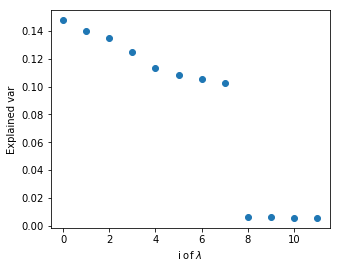

In [86]:
# PCA analyses on clusters
#X = spins# dataset at different temperatures
X = spins[20,...]# which temperature for dataset orgnised by tetrahedron
n_components = 12
pca = PCA(n_components=n_components)
pca.fit(X)

print(pca.explained_variance_ratio_,
      np.sum(pca.explained_variance_ratio_) )

print(pca.singular_values_)

X_reduced = pca.transform(X)
comps = pca.components_
print(pca.mean_)
plt.figure(figsize=(5,4))
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'o')
plt.xlabel(r'i of $\lambda$')
plt.ylabel('Explained var')
plt.show()

In [84]:
# For input data type 1st
print(comps.reshape(n_components,3456,3)[0,0:10,:])

[[-0.00836 -0.00856  0.01216]
 [-0.00832 -0.00851  0.01217]
 [-0.00841 -0.00852  0.01219]
 [-0.00827 -0.00854  0.01211]
 [-0.00835 -0.0085   0.01216]
 [-0.00833 -0.00856  0.01212]
 [-0.00831 -0.00853  0.01213]
 [-0.00836 -0.00847  0.01216]
 [-0.00827 -0.00849  0.01213]
 [-0.00837 -0.0085   0.01213]]


In [96]:
# For type 2nd
# print comps (loading), and sample representation (score)
np.set_printoptions(precision=5)
print(comps.shape, 
      X_reduced.shape,
      '\n','Comps',
      '\n',(comps).reshape(n_components,3,-1)[0:8,:], 
      '\n','Comps Sum SxSySz',
      '\n',(comps+ pca.mean_).reshape(n_components,3,-1).sum(axis=2),# sumSx sumSy sumSy on tetrahedron for first 3 PCA ~ 0, 2nd three PCA only one is significant FM
      '\n','Compare X and X\'',
      '\n', X.reshape(-1,3,4)[0:2,:,:],
      '\n', (X_reduced[0:2,0:8]@comps[0:8,:] + pca.mean_).reshape(-1,3,4)[0:2,:,:],
      '\n','Compare X-mean and X\'-mean',
      '\n', (X-pca.mean_).reshape(-1,3,4)[0:2,:,:],
      '\n', (X_reduced[0:2,0:8]@comps[0:8,:]).reshape(-1,3,4)[0:2,:,:],
      '\n','pca.mean',
      '\n',pca.mean_.reshape(3,4))

(12, 12) (1728, 12) 
 Comps + mean 
 [[[-0.05172  0.11151  0.57873  0.48453]
  [-0.00972 -0.10477 -0.1701  -0.07514]
  [ 0.06224 -0.01446 -0.4247  -0.43022]]

 [[ 0.38068  0.61456  0.16087 -0.25229]
  [-0.10007 -0.17826 -0.08132  0.13277]
  [-0.31104 -0.44819 -0.06961  0.13921]]

 [[ 0.62293 -0.46744  0.11541 -0.01551]
  [-0.25914  0.30831 -0.00972  0.10712]
  [-0.394    0.17077 -0.11693 -0.08968]]

 [[-0.19827 -0.1718   0.46699 -0.56703]
  [-0.0166  -0.04361 -0.26442  0.34216]
  [ 0.22121  0.21143 -0.20859  0.25546]]

 [[ 0.17178  0.01577  0.11905  0.11465]
  [-0.06101 -0.44241 -0.30201 -0.52996]
  [-0.12022  0.41382  0.16765  0.39699]]

 [[ 0.16334  0.10157 -0.16866 -0.0354 ]
  [-0.51784 -0.36975  0.49736  0.08484]
  [ 0.34994  0.23388 -0.31029 -0.02071]]

 [[ 0.01687 -0.04023  0.12073  0.0604 ]
  [-0.43579  0.45262 -0.10431 -0.39019]
  [ 0.40801 -0.39212 -0.01942  0.31836]]

 [[ 0.10672  0.06717 -0.07777  0.06003]
  [-0.37475 -0.10722 -0.475    0.30932]
  [ 0.26309  0.04457  0.54467

In [91]:
print((X-pca.mean_)[0:5,:].reshape(-1,3,4))

[[[-1.64453e-03 -8.25747e-04  1.50346e-03  1.12169e-03]
  [ 2.51123e-03  9.62440e-05 -1.78368e-03 -6.79076e-04]
  [-7.21595e-04  7.50391e-04 -2.84443e-04 -6.69877e-04]]

 [[ 1.07642e-03 -1.74115e-03 -2.34592e-04  3.34597e-04]
  [-6.61848e-04  1.23043e-03  3.11880e-04 -6.71098e-04]
  [-6.38728e-04 -6.03135e-04  1.75213e-04  1.13205e-03]]

 [[-1.14904e-03 -1.27380e-03 -2.42839e-04  8.70688e-04]
  [ 1.02868e-03 -1.46774e-04  1.07849e-03 -5.83362e-04]
  [ 1.32026e-03  1.54786e-03 -6.20667e-04 -1.51674e-03]]

 [[ 8.25419e-04  1.19965e-03  1.58700e-04 -1.59926e-03]
  [-5.66134e-04 -8.98364e-05  6.21743e-05  2.49400e-03]
  [-1.48559e-03 -1.02862e-03 -4.28101e-04 -7.52743e-04]]

 [[ 1.47905e-03  4.96533e-04  5.49709e-04 -1.46365e-03]
  [-1.78608e-03 -1.86473e-04  5.44741e-04 -3.55709e-05]
  [-2.48857e-04 -1.15464e-03 -9.34278e-04  1.83303e-03]]]


## With fake Hamiltionian: $Jx/|Jz|=1,2,3,3.5$

### Load to a object and plot

In [74]:
def loadmat_assign(file, name_profix, params=['Cp','stdm','mChi','sumTetra','MlocAbs','MhistCounts',
                                               'MhistCenters','sumTetraHistCounts','sumTetraHistCenters']):
    """
    Load 'mat' file, and assign global varibales with profix
    """
    import scipy.io as sio
    dat = sio.loadmat(file)
    #print(list(dat.keys()))
    vals = dat[list(dat.keys())[3]][0,0]
    keys = dat[list(dat.keys())[3]][0,0].dtype.descr
    print(keys)
    # Assemble the keys and values into variables with the same name as that used in MATLAB
    for i in range(len(keys)):
        key = keys[i][0]
        if key in params:
            val = np.squeeze(vals[key])  # squeeze is used to covert matlab (1,n) arrays into numpy (1,) arrays. 
            #print('global ' + key+name_profix)
            eval('global ' + key+name_profix)
            eval(key+name_profix+'=val') # creat varibles 'key_2p9'            
#     val = np.squeeze(vals['param']['x'][:,0])
#     exec('global ' + 'ts'+name_profix)
#     print(val,'global ' + 'Ts'+name_profix,'Ts'+name_profix+'=val')
#     exec('ts'+name_profix+'=val') 
#     ts_3 = val
    return

# The commented part:  d1 =loadmat_obj(in1); d2=loadmat_obj(in2), d1 and d2 are the same with 'in2'!!! 
# So we use a empty class or dictionary
#https://stackoverflow.com/questions/8948777/create-an-object-without-calling-a-class
class mc_stat(object): 
    def combine(self, obj0):# only combine: x, cp, mChi, stdm
        combi = np.vstack( [np.hstack([self.x,obj0.x]), 
                            np.hstack([self.Cp,obj0.Cp]), 
                            np.hstack([self.mChi,obj0.mChi])                           
                            ] )
        sortIdx = combi[0,:].argsort()
        combi_sort = combi[:, sortIdx]
        
        self.x, self.Cp, self.mChi, self.stdm, self.MlocAbs \
            = combi_sort[0,:], combi_sort[1,:], combi_sort[2,:], \
                np.dstack([self.stdm,obj0.stdm])[:,:,sortIdx],\
                np.dstack([self.MlocAbs,obj0.MlocAbs])[:,:,sortIdx]
        return
#     def __init__(self,x, Cp,stdm,mChi,sumTetra,MlocAbs,MhistCounts,MhistCenters,sumTetraHistCounts,sumTetraHistCenters):
#         self.x = x
#         self.Cp = Cp
#         self.mChi = mChi
#         self.stdm = stdm
#         self.sumTetra = sumTetra
#         self.MlocAbs = MlocAbs
#         self.MhistCounts = MhistCounts
#         self.MhistCenters = MhistCenters
#         self.sumTetraHistCounts = sumTetraHistCounts
#         self.sumTetraHistCenters = sumTetraHistCenters
        
def loadmat_obj(file, params=['Cp','stdm','mChi','sumTetra','MlocAbs','MhistCounts',
                                               'MhistCenters','sumTetraHistCounts','sumTetraHistCenters']):
    """
    Load 'mat' file, and assign global varibales
    """
    import scipy.io as sio
    dat = sio.loadmat(file)
    vals = dat[list(dat.keys())[3]][0,0]
    keys = dat[list(dat.keys())[3]][0,0].dtype.descr
    print(keys)
    
    temp = mc_stat()
    # Assemble the keys and values into variables with the same name as that used in MATLAB
    for i in range(len(keys)):
        key = keys[i][0]
        if key in params:
            val = np.squeeze(vals[key])  # squeeze is used to covert matlab (1,n) arrays into numpy (1,) arrays.  
            exec('temp.'+key+'=val')
    temp.x = np.squeeze(vals['x']) # new small mat files        
    #temp.x = vals['param'][0,0]['x'][0,:] # orginal mat struct from MC 
    return temp

fpath = r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab'
# loadmat_assign(os.path.join(fpath, r'mc_state_0p01-0p49k_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_jx_eq_-2.9jz'),
#                name_profix='_3')

stat3 = loadmat_obj(os.path.join(fpath, r'mc_state_0p5_0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3jz_less'))
print(stat3.x,stat3.Cp)

[('x', '|O'), ('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O')]
[0.5  0.49 0.48 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37
 0.36 0.35 0.34 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23
 0.22 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09
 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01] [ 1.16034024  1.18404668  1.23193642  1.29185144  1.31968809  1.40942701
  1.45720467  1.5295664   1.55906166  1.59637697  1.72856208  1.7411857
  1.82359996  1.86553906  2.02131143  2.12803849  2.21352279  2.31278152
  2.44626997  2.60017109  2.68422603  2.82976297  3.08187648  3.25355518
  3.4303261   3.55453827  3.89807567  4.12996988  4.58359488  4.85357286
  5.32982669  5.76676937  6.32774866  6.87646358  8.03110473 18.5256751
 15.57474175 13.08013209 11.96930502 1

In [75]:
fnames = ['mc_state_0p5-0p01k_para_1e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-jz_less',
          'mc_state_0p5-0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_0p01kStep_less',# nd2zr2o7
          'mc_state_0p5_0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3jz_less',
          'mc_state_0p5_0p01k_para_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p1jz_less',
          'mc_state_0p5_0p01k_para_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p2jz_less',
          'mc_state_0p5_0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p3jz_less',
          'mc_state_0p5_0p01k_para_1e6mcs5e5_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p3jz_less',
          'mc_state_0p195_0p055k_para_1e6mcs5e5_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p3jz_less',
          'mc_state_0p5_0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p5jz_less']
stat1p0 = loadmat_obj(os.path.join(fpath, fnames[0]))
stat2p0 = loadmat_obj(os.path.join(fpath, fnames[1]))
stat3p0 = loadmat_obj(os.path.join(fpath, fnames[2]))
stat3p1 = loadmat_obj(os.path.join(fpath, fnames[3]))
stat3p2 = loadmat_obj(os.path.join(fpath, fnames[4]))
stat3p3 = loadmat_obj(os.path.join(fpath, fnames[5]))
stat3p3_1 = loadmat_obj(os.path.join(fpath, fnames[6]))
stat3p3_2 = loadmat_obj(os.path.join(fpath, fnames[7]))
stat3p5 = loadmat_obj(os.path.join(fpath, fnames[8]))

# Test combine
print(stat3p3_1.stdm.shape,stat3p3_2.stdm.shape)
print(stat3p3_1.MlocAbs.shape,stat3p3_2.MlocAbs.shape)
print(stat3p3_1.x)
stat3p3_1.combine(stat3p3_2)
print(stat3p3_1.x)

varables = [stat1p0,stat2p0,stat3p0,stat3p1,stat3p2,stat3p3,stat3p3_1,stat3p3_2,stat3p5]


### Load the origina MC struct of Matlab using old 'temp.x = vals['param'][0,0]['x'][0,:]'
# stat1p0 = loadmat_obj(os.path.join(fpath, r'mc_state_0p01-0p49k_1e5mcs_cp_jx_eq_-jz.mat'))
# stat2p0 = loadmat_obj(os.path.join(fpath, r'mc_state_0p01-0p49k_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ'))
# stat2p9 = loadmat_obj(os.path.join(fpath, r'mc_state_0p01-0p49k_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_jx_eq_-2.9jz'))
# stat3p0 = loadmat_obj(os.path.join(fpath, r'mc_state_0p5_0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3jz'))
# stat3p3 = loadmat_obj(os.path.join(fpath, r'mc_state_0p5_0p01k_para_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p3jz'))
# stat3p5 = loadmat_obj(os.path.join(fpath, r'mc_state_0p5_0p01k_sequential_5e5mcs_histMlocXYZ_histSumTetraMlocXZY_jx_eq_-3p5jz'))

[('x', '|O'), ('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O')]
[('x', '|O'), ('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O')]
[('x', '|O'), ('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O')]
[('x', '|O'), ('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), (

#### Plot chi(T) Cp(T)

In [86]:
latexify(columns=1, fig_height=5); 
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

fig, (ax1,ax2)= plt.subplots(nrows=2, ncols=1,sharex=True)
kB = 0.0862

ax1.plot(stat1p0.x, np.average(stat1p0.stdm**2,axis=1)[0,:]/kB/stat1p0.x, label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$ ',lw=0.5)
ax1.plot(stat2p0.x, np.average(stat2p0.stdm**2,axis=1)[0,:]/kB/stat2p0.x, label=r'$\sim2$ ',lw=0.5)
#ax1.plot(stat2p9.x, np.average(stat2p9.stdm**2,axis=1)[0,:]/kB/stat2p9.x, label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$ ',lw=0.5)
ax1.plot(stat3p0.x, np.average(stat3p0.stdm**2,axis=1)[0,:]/kB/stat3p0.x, label=r'$3$ ',lw=0.5)
ax1.plot(stat3p1.x, np.average(stat3p1.stdm**2,axis=1)[0,:]/kB/stat3p1.x, label=r'$3.1$ ',lw=0.5)
ax1.plot(stat3p2.x, np.average(stat3p2.stdm**2,axis=1)[0,:]/kB/stat3p2.x, label=r'$3.2$ ',lw=0.5)
#ax1.plot(stat3p3.x, np.average(stat3p3.stdm**2,axis=1)[0,:]/kB/stat3p3.x, label=r'$3.3$ ',lw=0.5)
ax1.plot(stat3p3_1.x, np.average(stat3p3_1.stdm**2,axis=1)[0,:]/kB/stat3p3_1.x, label=r'$3.3$ ',lw=0.5)
#ax1.plot(stat3p3_2.x, np.average(stat3p3_2.stdm**2,axis=1)[0,:]/kB/stat3p3_2.x, label=r'$3.3$ ',lw=0.5)

# combi = np.vstack( [np.hstack([stat3p3_1.x,stat3p3_2.x]), 
#                     np.hstack([np.average(stat3p3_1.stdm**2,axis=1)[0,:]/kB/stat3p3_1.x,
#                                np.average(stat3p3_2.stdm**2,axis=1)[0,:]/kB/stat3p3_2.x,]),
#                     np.hstack([stat3p3_1.Cp,stat3p3_2.Cp])])
# combi_sort = combi[:,combi[0,:].argsort()]
# ax1.plot(combi_sort[0,:], combi_sort[1,:], label=r'$3.3$ ',lw=0.5)
ax1.plot(stat3p5.x, np.average(stat3p5.stdm**2,axis=1)[0,:]/kB/stat3p5.x, label=r'$3.5$ ',lw=0.5)

ax1.set_xlabel('T (K)')
ax1.set_ylabel(r'$\chi$',labelpad=0)
ax1.set_xlim([0,0.3])
ax1.xaxis.set_ticks([0,0.1,0.2,0.3,0.4,0.5])
ax1.legend(loc=(0.6,0.3),frameon=False,fontsize=8,handlelength=0.5,handletextpad=0.1,labelspacing=0)

ax2.plot(stat1p0.x, stat1p0.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1)$',lw=0.5)
ax2.plot(stat2p0.x, stat2p0.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|\sim2)$',lw=0.5)
#ax2.plot(stat2p9.x, stat2p9.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1)$',lw=0.5)
ax2.plot(stat3p0.x, stat3p0.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3)$',lw=0.5)
ax2.plot(stat3p1.x, stat3p1.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.1)$',lw=0.5)
ax2.plot(stat3p2.x, stat3p2.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.2)$',lw=0.5)

#ax2.plot(stat3p3.x, stat3p3.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3)$',lw=0.5)
ax2.plot(stat3p3_1.x, stat3p3_1.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3)$',lw=0.5)
#ax2.plot(stat3p3_2.x, stat3p3_2.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3)$',lw=0.5)
#ax2.plot(combi_sort[0,:], combi_sort[2,:], label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3)$',lw=0.5)

ax2.plot(stat3p5.x, stat3p5.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.5)$',lw=0.5)

ax2.set_xlabel('T (K)')
ax2.set_ylabel(r'$C_v$ (J/K/mol)', color='k',labelpad=0)
ax2.set_xlim([0,0.3])
ax2.set_ylim([0,32])
ax2.xaxis.set_ticks([0,0.1,0.2,0.3])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_chi_cp_2.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

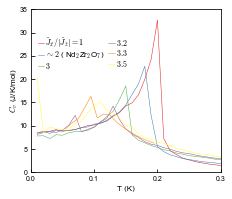

In [77]:
latexify(columns=1,fig_height=3); 
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

fig, ax2= plt.subplots(nrows=1, ncols=1,sharex=True)
kB = 0.0862

ax2.plot(stat1p0.x, stat1p0.Cp, label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$',lw=0.5)
ax2.plot(stat2p0.x, stat2p0.Cp, label=r'$\sim2$ ( Nd$_2$Zr$_2$O$_7$)',lw=0.5)
#ax2.plot(stat2p9.x, stat2p9.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1)$',lw=0.5)
ax2.plot(stat3p0.x, stat3p0.Cp, label=r'$3$',lw=0.5)
#ax2.plot(stat3p1.x, stat3p1.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.1)$',lw=0.5)
ax2.plot(stat3p2.x, stat3p2.Cp, label=r'$3.2$',lw=0.5)

#ax2.plot(stat3p3.x, stat3p3.Cp, label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3)$',lw=0.5)
#ax2.plot(stat3p3_1.x, stat3p3_1.Cp, label=r'$3.3)$',lw=0.5)
ax2.plot(stat3p3_2.x, stat3p3_2.Cp, label=r'$3.3$',lw=0.5)
#ax2.plot(combi_sort[0,:], combi_sort[2,:], label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3)$',lw=0.5)

ax2.plot(stat3p5.x, stat3p5.Cp, label=r'$3.5$',lw=0.5)

ax2.set_xlabel('T (K)')
ax2.set_ylabel(r'$C_v$ (J/K/mol)', color='k',labelpad=0)
#ax2.set_yscale("log", nonposy='clip')
ax2.set_xlim([0,0.3])
ax2.set_ylim([0,35])
ax2.xaxis.set_ticks([0,0.1,0.2,0.3])

ax2.legend(loc=(0.02,0.6),ncol=2,columnspacing=0.5,frameon=False,fontsize=8,handlelength=0.8,handletextpad=0.1,labelspacing=0)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_chi_cp_3.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

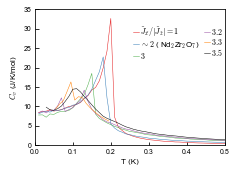

In [78]:
#%matplotlib qt
from scipy.signal import savgol_filter

latexify(columns=1,fig_height=2.5); 
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 


fig, ax2= plt.subplots(nrows=1, ncols=1,sharex=True)
kB = 0.0862

wd = 3; order=2; idx_min=50
y_smooth = savgol_filter(stat1p0.Cp[:idx_min], wd,order)
ax2.plot(stat1p0.x[:idx_min], y_smooth,label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$',lw=0.5)

y_smooth = savgol_filter(stat2p0.Cp, wd,order)
ax2.plot(stat2p0.x, y_smooth,  label=r'$\sim2$ ( Nd$_2$Zr$_2$O$_7$)',lw=0.5)

y_smooth = savgol_filter(stat3p0.Cp[:50],wd,order)
ax2.plot(stat3p0.x[:50], y_smooth, label=r'$3$',lw=0.5)

y_smooth = savgol_filter(stat3p2.Cp, wd,order)
ax2.plot(stat3p2.x, y_smooth,label=r'$3.2$',lw=0.5)

y_smooth = savgol_filter(stat3p3_2.Cp, wd,order)
ax2.plot(stat3p3_2.x, y_smooth, label=r'$3.3$',lw=0.5)

y_smooth = savgol_filter(stat3p5.Cp[:48], 5,order)
ax2.plot(stat3p5.x[:48], y_smooth,'black', label=r'$3.5$',lw=0.5)

ax2.set_xlabel('T (K)')
ax2.set_ylabel(r'$C_v$ (J/K/mol)', color='k')
#ax2.set_yscale("log", nonposy='clip')
ax2.set_xlim([0,0.5])
ax2.set_ylim([0,35])
ax2.xaxis.set_ticks([0,0.1,0.2,0.3,0.4,0.5])

ax2.legend(loc=(0.5,0.6),ncol=2,columnspacing=0.5,frameon=False,fontsize=8,handlelength=0.8,handletextpad=0.1,labelspacing=0)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_cp_new1.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

In [85]:
#%matplotlib qt
from scipy.signal import savgol_filter
%matplotlib ipympl
%matplotlib ipympl
%matplotlib ipympl
latexify(columns=1,fig_height=2.5); 
params = {'legend.fontsize': 9,
         'axes.labelsize': 9,
         'xtick.labelsize':9,
         'ytick.labelsize':9 }
mpl.rcParams.update(params)

mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

fig, ax2= plt.subplots(nrows=1, ncols=1,sharex=True)
kB = 0.0862

wd = 3; order=2; idx_min=50
y_smooth = savgol_filter(stat1p0.Cp[:idx_min], wd,order)
ax2.plot(stat1p0.x[:idx_min], y_smooth,'-o',ms=3,label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$',lw=0.5)

y_smooth = savgol_filter(stat2p0.Cp, wd,order)
ax2.plot(stat2p0.x, y_smooth, '-s',ms=3, label=r'$\sim2$ ( Nd$_2$Zr$_2$O$_7$)',lw=0.5)

y_smooth = savgol_filter(stat3p0.Cp[:50],wd,order)
ax2.plot(stat3p0.x[:50], y_smooth,'-^',ms=3, label=r'$3$',lw=0.5)

y_smooth = savgol_filter(stat3p2.Cp, wd,order)
ax2.plot(stat3p2.x, y_smooth, '-*',ms=3,label=r'$3.2$',lw=0.5)

y_smooth = savgol_filter(stat3p3_2.Cp, wd,order)
ax2.plot(stat3p3_2.x, y_smooth,'-x',ms=3, label=r'$3.3$',lw=0.5)

y_smooth = savgol_filter(stat3p5.Cp[:48], wd,order)
ax2.plot(stat3p5.x[:48], y_smooth,'k-+',ms=3, label=r'$3.5$',lw=0.5)

ax2.set_xlabel('T (K)')
ax2.set_ylabel(r'$C_v$ (J/K/mol)', color='k',labelpad=0)
#ax2.set_yscale("log", nonposy='clip')
ax2.set_xlim([0,0.3])
ax2.set_ylim([0,35])
ax2.xaxis.set_ticks([0,0.1,0.2,0.3])

ax2.legend(loc=(0.05,0.35),ncol=1,columnspacing=0.5,frameon=True,fontsize=10,handlelength=0.8,handletextpad=0.1,labelspacing=0,facecolor='b',framealpha=0)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_cp_new00.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Average(|tau_{x,y,z}|): four pannels

In [87]:
#%matplotlib qt
latexify(columns=1,fig_height=5)
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

texts = [r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=2$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.1$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.2$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.3$',
         r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=3.5$']
fig, axs = plt.subplots(nrows=3, ncols=2,sharex=True,sharey=True)
axs = list(axs.flat)
for idx, ii in enumerate([0,2,3,4,5,8]):
    stat = varables[ii]
    Ts    = stat.x
    Mloc_av = np.average(stat.MlocAbs,1)
    if idx==2: #delete one bad point
        Ts = np.delete(Ts, -4)
        Mloc_av = np.delete(Mloc_av, -4,axis=1)
        
    axs[idx].plot(Ts,Mloc_av[0,:],'b',label=r'$\leftangle|\tau^\tilde{x}|\rightangle$',lw=0.5)
    axs[idx].plot(Ts,Mloc_av[1,:],'k',label=r'$\leftangle|\tau^\tilde{y}|\rightangle$',lw=0.5)
    axs[idx].plot(Ts,Mloc_av[2,:],'r',label=r'$\leftangle|\tau^\tilde{z}|\rightangle$',lw=0.5)
    axs[idx].axhline(y=0.25,c='grey',lw=0.8,zorder=0)
    axs[idx].set_xlim([0,0.5])
    axs[idx].set_ylim([0,0.5])
    axs[idx].text(0.65,0.8,texts[ii], size=10, transform=axs[idx].transAxes,
                   ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
    if idx in [4,5]:
        axs[idx].set_xlabel('T (K)',labelpad=0)
        axs[idx].set_xticks([0,0.1,0.2,0.3,0.4,0.5])
        axs[idx].set_xticklabels(['0','0.1','0.2','0.3','0.4','0.5'])
    if idx in [0,2,4]:
        axs[idx].set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$',labelpad=0)
        axs[idx].set_yticks([0,0.1,0.2,0.3,0.4,0.5])
        
    if idx==0:
        axs[idx].legend(frameon=False,ncol=2,fontsize=10,handlelength=0.5,handletextpad=0.01,
                        columnspacing=0.1,labelspacing=0,loc=(0.25,-0.02))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.12,hspace=0.15)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_tau_avs.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
        
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [88]:
# Plot average(|tau_{x,y,z}|): separated figures for different jx/jz
latexify(columns=1)
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

# No insert the 0 K
for ii in range(0,5):
    stat = varables[ii]
    Ts    = stat.x
    Mloc_av = np.average(stat.MlocAbs,1)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(Ts,Mloc_av[0,:],c='none',edgecolors='b',marker='^',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{x}|\rightangle$');ax.plot(Ts,Mloc_av[0,:],c='b',lw=0.5)
    ax.scatter(Ts,Mloc_av[1,:],c='none',edgecolors='k',marker='s',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{y}|\rightangle$');ax.plot(Ts,Mloc_av[1,:],c='k',lw=0.5)
    ax.scatter(Ts,Mloc_av[2,:],c='none',edgecolors='r',marker='o',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{z}|\rightangle$');ax.plot(Ts,Mloc_av[2,:],c='r',lw=0.5)
    ax.axhline(y=0.25,c='grey',lw=0.8,zorder=0)
    ax.set_xlim([0,0.5])
    ax.set_ylim([0,0.5])
    ax.set_xlabel('T (K)')
    ax.set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$')
    ax.legend(frameon=False,ncol=2,fontsize=12,handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.4,0.6))
    #fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_mloc_xyz_av_2p9.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

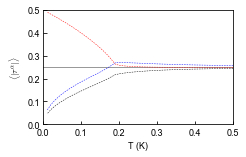

In [152]:
# Plot average(|tau_{x,y,z}|): in single figure for different jx/jz
latexify(columns=1)
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

dashes = [[2,2],[3,2],[4,2],[5,2],[6,2],[7,2]]
fig, ax = plt.subplots(nrows=1, ncols=1)
for ii in [1,2,3,4]:
    stat = varables[ii]
    Ts    = stat.x
    Mloc_av = np.average(stat.MlocAbs,1)

    ax.plot(Ts,Mloc_av[0,:],'-b',dashes=dashes[ii],lw=0.5)
    ax.plot(Ts,Mloc_av[1,:],'-k',dashes=dashes[ii],lw=0.5)
    ax.plot(Ts,Mloc_av[2,:],'-r',dashes=dashes[ii],lw=0.5)
    ax.axhline(y=0.25,c='grey',lw=0.8,zorder=0)
    ax.set_xlim([0,0.5])
    ax.set_ylim([0,0.5])
    ax.set_xlabel('T (K)')
    ax.set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$')
    #ax.legend(frameon=False,ncol=2,fontsize=12,handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.4,0.6))
    #fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_mloc_xyz_av_2p9.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
    plt.show()

#### Plot gap and reduced ordered spin

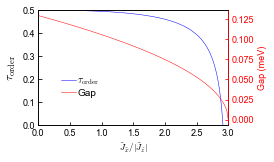

In [153]:
latexify(columns=1); 
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

dat = np.genfromtxt(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\r_redm_gap.txt',delimiter=',')
r, redM, gap = np.hsplit(dat,3)

fig, ax1 = plt.subplots(nrows=1, ncols=1)

l0 = ax1.plot(r, redM,  'b',label=r'$\tau_\mathrm{order}$',lw=0.5)
ax1.set_xlabel(r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|$')
ax1.set_ylabel(r'$\tau_\mathrm{order}$',fontsize=12)
ax1.set_xlim([0,3])
ax1.set_ylim([0,0.5])

ax2 = ax1.twinx()
l1 = ax2.plot(r,gap,'r',label=r'Gap',lw=0.5)
ax2.set_ylabel(r'Gap (meV)', color='r')
ax2.yaxis.label.set_color('r')
ax2.spines["right"].set_edgecolor('r')
ax2.tick_params('y', colors='r')

ax2.set_xlim([0,3])

ls = l0+l1
labs = [l.get_label() for l in ls]
ax1.legend(ls, labs, loc=(0.1,0.2), frameon=False,fontsize=10,handlelength=1.5,handletextpad=0.1,labelspacing=0.2)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\r_redm_gap.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

#### Histgrams for different Jx/Jz

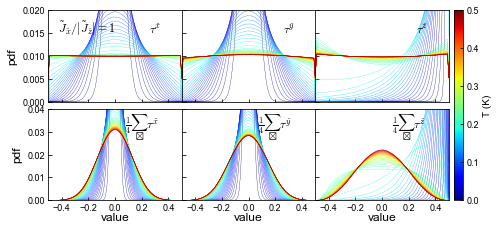

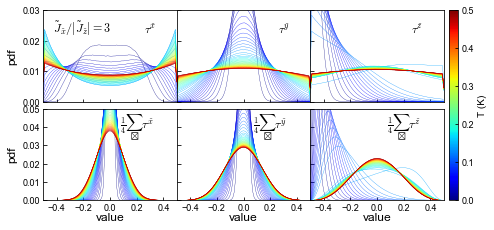

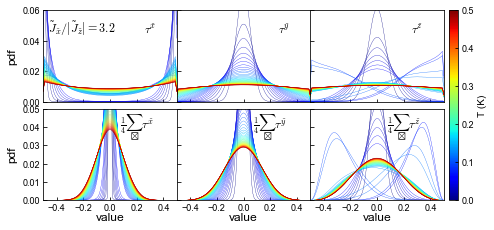

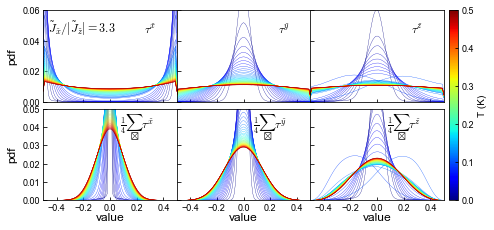

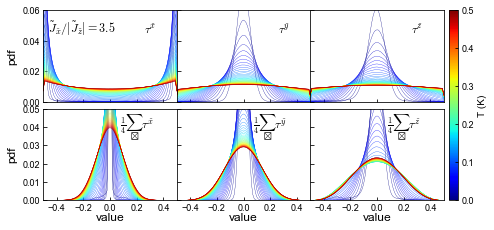

In [158]:
latexify(fig_height=3.,columns=2)
   
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

lablefs = 12

texts0 = [[r'$\tau^\tilde{x}$', r'$\tau^\tilde{y}$', r'$\tau^\tilde{z}$'],
          [r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{x}$', 
           r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{y}$', 
           r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{z}$']]

yulims0 = [0.02,0.02,0.03,0.06,0.06,0.06,0.06,0.06,0.06]
yulims1 = [0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
#[stat1p0,stat2p0,stat3p0,stat3p1,stat3p2,stat3p3,stat3p3_1,stat3p3_2,stat3p5]
for ii in [0,2,4,5,8]:
    stat = varables[ii]
    MhistCenters, MhistCounts = stat.MhistCenters, stat.MhistCounts
    sumTetraHistCenters, sumTetraHistCounts = stat.sumTetraHistCenters, stat.sumTetraHistCounts
    
    fig, axs = plt.subplots(nrows=2, ncols=3,sharex=True,sharey='row')
    colors = mpl.cm.jet_r(np.linspace(0,1,50,endpoint=True))

    for i in range(0,3):
        for j in range(49,0,-1):
            axs[0,i].plot(MhistCenters,MhistCounts[:,i,j]/3456,c=colors[j],lw=0.3)
        axs[0,i].text(0.8,0.8, texts0[0][i], size=12, transform=axs[0,i].transAxes,
                      ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
        
        for j in range(49,0,-1):
            axs[1,i].plot(sumTetraHistCenters,sumTetraHistCounts[:,i,j]/1728,c=colors[j],lw=0.3)
        axs[1,i].text(0.7,0.8, texts0[1][i], size=12, transform=axs[1,i].transAxes,
                      ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
        
        axs[1,i].set_xticks(np.arange(-0.6, 0.6, step=0.2))
        axs[1,i].set_xlim([-0.5,0.5])
    
    axs[0,0].set_ylim([0,yulims0[ii]])
    axs[1,0].set_ylim([0,yulims1[ii]])
    axs[0,0].text(0.29,0.8, texts[ii], size=12, transform=axs[0,0].transAxes,
                   ha='center', va='center', backgroundcolor='none',
                   bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
    # colorbar
    norm = mpl.colors.Normalize(vmin=0, vmax=0.5)
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])

    fig.subplots_adjust(bottom=0.1, top=0.98, left=0.09, right=1.05, wspace=0.0, hspace=0.08)
    cb = plt.colorbar(cmap, ax=axs.flat,pad=0.01)
    cb.set_ticks([x for x in np.arange(0, 0.6, 0.1)])
    cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 0.6, 0.1)])
    cb.ax.set_ylabel('T (K)',size=lablefs-2)

    axs[1,0].set_xlabel(r'value',size=lablefs,labelpad=0)
    axs[1,1].set_xlabel(r'value',size=lablefs,labelpad=0)
    axs[1,2].set_xlabel(r'value',size=lablefs,labelpad=0)
    axs[0,0].set_ylabel('pdf',size=lablefs,labelpad=5)
    axs[1,0].set_ylabel('pdf',size=lablefs,labelpad=5)
    if ii==4:
        fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_tau_hist3p2.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
    plt.show()

### Load and plot normally with assigning many variables

In [60]:
# Load the mat file : Jx/|Jz|=2.9
import scipy.io as sio
#mc_cal = sio.loadmat(
#    r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_state_0p01-0p49k_5e5mcs_0p1-0p3k_cp_jx_eq_-2.9jz.mat')
mc_cal = sio.loadmat(
    r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_state_0p01-0p49k_5e5mcs_histMlocXYZ_histSumTetraMlocXYZ_jx_eq_-2.9jz')
# Assign fields to varibles of the same names
vals = mc_cal['stat'][0,0]
keys = mc_cal['stat'][0,0].dtype.descr
print(keys)

print(keys[1][0])
print(mc_cal['stat'][0,0]['Cp'])
print(mc_cal['stat'][0,0]['param'][0,0].dtype.descr)

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i][0]
    if key in ['Cp','stdm','mChi','sumTetra','MlocAbs','MhistCounts','MhistCenters','sumTetraHistCounts','sumTetraHistCenters']:
        val = np.squeeze(vals[key])  # squeeze is used to covert matlab (1,n) arrays into numpy (1,) arrays. 
        exec(key+'_2p9' + '=val') # creat varibles 'key_2p9'
        print(key)
Ts_2p9 = mc_cal['stat'][0,0]['param'][0,0]['x'][0,:]

[('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('sumTetra', '|O'), ('MlocAbs', '|O'), ('MhistCounts', '|O'), ('MhistCenters', '|O'), ('sumTetraHistCounts', '|O'), ('sumTetraHistCenters', '|O'), ('obj', '|O'), ('state', '|O'), ('param', '|O')]
stdm
[[ 1.11899168  1.16674249  1.18442897  1.23793851  1.25026149  1.32231127
   1.38200136  1.41508388  1.46551063  1.50628682  1.62123506  1.64243242
   1.82346681  1.8228793   1.89339947  1.986302    2.08062766  2.19876105
   2.29832166  2.45315179  2.60317561  2.74169957  2.89496629  3.11704668
   3.20314025  3.38720555  3.72823587  3.92230651  4.18658098  4.62459647
   4.89329861  5.70641908  6.19933065  6.95845926 11.37391701 18.83409933
  14.57353911 12.55353928 11.91440888 10.39714516 10.04072796  9.62053188
   9.20093061  8.92538403  8.39312849  8.55759859  8.24489608  8.00915835
   8.08501418  7.85237501]]
[('initT', '|O'), ('endT', '|O'), ('cool', '|O'), ('nMC', '|O'), ('n

In [158]:
# Load the mat file with: Jx/|Jz|=1
mc_cal = sio.loadmat(
    r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_state_0p01-0p49k_1e5mcs_cp_jx_eq_-jz.mat')
# Assign fields to varibles of the same names
vals = mc_cal['stat'][0,0]
keys = mc_cal['stat'][0,0].dtype.descr
print(keys)

print(keys[1][0])
print(mc_cal['stat'][0,0]['Cp'])
print(mc_cal['stat'][0,0]['param'][0,0].dtype.descr)

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i][0]
    if key in ['Cp','stdm','mChi','sumTetra','MlocAbs','MhistCounts','MhistCenters','sumTetraHistCounts','sumTetraHistCenters']:
        val = np.squeeze(vals[key])  # squeeze is used to covert matlab (1,n) arrays into numpy (1,) arrays. 
        exec(key+'_1' + '=val') # creat varibles 'key_2p9'
        print(key)
Ts_1 = mc_cal['stat'][0,0]['param'][0,0]['x'][0,:]

[('avgm', '|O'), ('stdm', '|O'), ('avgE', '|O'), ('stdE', '|O'), ('Cp', '|O'), ('mChi', '|O'), ('magM', '|O'), ('obj', '|O'), ('state', '|O'), ('param', '|O')]
stdm
[[ 0.42777356  0.47007345  0.4676145   0.53481438  0.52451413  0.58705572
   0.58796964  0.63409578  0.65227024  0.68767455  0.71257337  0.7613651
   0.82176497  0.82803032  0.9351338   1.01996751  1.0928254   1.19000329
   1.23346295  1.41116311  1.40748948  1.66388757  1.77831684  1.98689939
   2.31347981  2.53335172  3.06816289  3.41276548  4.73953524  8.54357503
  20.38179899 24.81766669 19.57577181 17.79162537 15.62970161 13.82423132
  12.80111225 11.6435313  10.77904899 10.19273232  9.62101845  9.70488168
   9.94434365  9.28137844  9.68745503  9.76957917  9.05819707  7.99288268
   9.03889514  7.25786851]]
[('Stats', '|O'), ('fStat', '|O'), ('x', '|O'), ('title', '|O')]
stdm
Cp
mChi


## MC neutron scattering

### MC dynamics (be careful: same normalization)

#### Load data

In [22]:
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab/'
fname = [
    r'nzo_stats_spinw_(hh0)_10by10by10_nMC_equill5e5_nStat5e5_nEvery1000_51AverageForSomeTs_151-253AverageFor4Ts(extraAccumu)_ndt_1e3_tol_1e-8_0p05-0p2K_12Ts.mat', 
    r'nzo_stats_8by8by8_nMC1e5_nStat1e5_ndt_1e3_tol_1e-8_0p05-2.25K13Ts.mat']

mc_dyn = dict.fromkeys(['Ts','hkl','omeaga','sqws'])

data = sio.loadmat(os.path.join(fpath, fname[0]),squeeze_me=True,struct_as_record=False,mat_dtype=False)
# struct_as_record false usage: dat.attr (has right dtye now otherwise dtype=object)
for i in range(0,12):
    temp = data['stats'][i]
    if i==0:
#print(temp.sqw)
        mc_dyn['Ts'] = [temp.T]
        mc_dyn['sqws'] = [temp.sqw]
        mc_dyn['hkl'] = temp.hkl
        #(mc_dyn['hkl'])
        mc_dyn['omeaga'] = temp.omeaga
    else:
        mc_dyn['Ts'].append(temp.T)
        mc_dyn['sqws'].append(temp.sqw)

In [23]:
print(mc_dyn['Ts'])

[0.05, 0.1, 0.125, 0.15, 0.165, 0.175, 0.18, 0.185, 0.1875, 0.19, 0.195, 0.2]


#### EQ slice

0.05
0.15
0.18
0.2


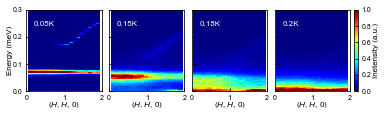

In [24]:
latexify(fig_height=1.5,columns=2)

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7,
         'font.size':8}
mpl.rcParams.update(params)

texts = ['0.05K','0.15K','0.18K','0.2K']

fig, axs = plt.subplots(nrows=1,ncols=4, sharey=True)
fig.subplots_adjust(wspace=0.1)

XX, YY = np.meshgrid(mc_dyn['hkl'][0,:], mc_dyn['omeaga'])
for idx, i in enumerate([0,3,6,11]):
    print(mc_dyn['Ts'][i])
    pcol = axs[idx].pcolormesh(XX-0.05,YY-0.00167, mc_dyn['sqws'][i].T/np.nanmax(mc_dyn['sqws'][0][11,:]),vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
    pcol.set_edgecolor('face') # remove the white lines in the plot

    axs[idx].axis([0,2.0, -0.0, 0.3])
    if idx==0:
        axs[idx].set_ylabel('Energy (meV)',labelpad=0)
    axs[idx].set_xlabel('($H$, $H$, 0)',labelpad=0)
    axs[idx].text(0.1,0.8,texts[idx],transform=axs[idx].transAxes,color='w')
    #plt.minorticks_on()

    if idx==3:
        cb = plt.colorbar(pcol,ax=axs,ticks=np.linspace(0,1,num=6,endpoint=True),pad=0.01) # label='Intensity', ticks=range(0,100)
        cb.ax.set_ylabel('Inetensity (a.u.)',labelpad=2)
        #cb.ax.tick_params(labelsize=20)
    
#fig.savefig(os.path.join(fpath,'mc_dyn_eq.pdf'), bbox_inches="tight",pad_inches=0,verbose=True)  
plt.show()

#### IE cut at 0.5/1.9(hh0): vstack, hstack

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(21, 106)
0.05
0.1
0.125
0.15
0.165
0.175
0.18
0.185
0.1875
0.2


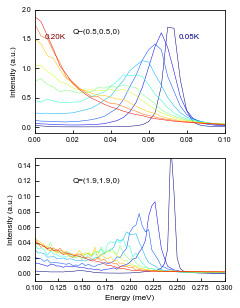

In [25]:
# Vstack
%matplotlib qt
latexify(columns=1,fig_height=5)
params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7,
         'font.size':8}
mpl.rcParams.update(params)

fig, axs = plt.subplots(nrows=2, ncols=1)

omeaga = np.squeeze(mc_dyn['omeaga'])
print(mc_dyn['sqws'][1].shape)

colors = mpl.cm.jet(np.linspace(0,1,11,endpoint=True))

for idx, i in enumerate([0,1,2,3,4,5,6,7,8,11]):
    print(mc_dyn['Ts'][i])
    #print(np.nanmean(mc_dyn['sqws'][i][13,:]))
    axs[0].plot( omeaga, np.nanmean(mc_dyn['sqws'][i][0:10,:],axis=0)/np.nanmax(mc_dyn['sqws'][0][13,:]), c=colors[idx],lw=0.5,label=mc_dyn['Ts'][i] )
    axs[1].plot( omeaga, np.nanmean(mc_dyn['sqws'][i][18:19,:],axis=0)/np.nanmax(mc_dyn['sqws'][0][13,:]), c=colors[idx],lw=0.5,label=mc_dyn['Ts'][i] )

    axs[0].axis([0,0.1,-0.1,2])
    axs[1].axis([0.1,0.3,-0.01,0.15])
    
#plt.legend(frameon=False,ncol=1,handlelength=1.,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(1,0.0))
axs[1].set_xlabel('Energy (meV)')
axs[0].set_ylabel('Intensity (a.u.)')
axs[1].set_ylabel('Intensity (a.u.)')

axs[0].text(0.076,1.5,'0.05K',color=colors[0])
axs[0].text(0.005,1.5,'0.20K',color=colors[-1])
axs[0].text(0.2,0.8,'Q~(0.5,0.5,0)',transform=axs[0].transAxes)
axs[1].text(0.2,0.8,'Q=(1.9,1.9,0)',transform=axs[1].transAxes)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.05
0.1
0.125
0.15
0.165
0.175
0.18
0.185
0.2


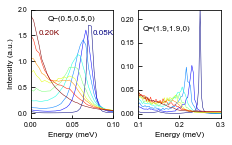

In [26]:
# hstack
%matplotlib qt
latexify(columns=1,fig_height=2)
params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7,
         'font.size':8}
mpl.rcParams.update(params)

fig, axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'wspace':0.3})
omeaga = np.squeeze(mc_dyn['omeaga'])
colors = mpl.cm.jet(np.linspace(0,1,9,endpoint=True))

for idx, i in enumerate([0,1,2,3,4,5,6,7,11]):
    print(mc_dyn['Ts'][i])
    axs[0].plot( omeaga, np.nanmean(mc_dyn['sqws'][i][0:10,:],axis=0)/np.nanmax(mc_dyn['sqws'][0][13,:]), c=colors[idx],lw=0.5,label=mc_dyn['Ts'][i] )
    axs[1].plot( omeaga,            mc_dyn['sqws'][i][19,:]          /np.nanmax(mc_dyn['sqws'][0][13,:]), c=colors[idx],lw=0.5,label=mc_dyn['Ts'][i] )

    axs[0].axis([0,0.1,-0.1,2])
    axs[1].axis([0.1,0.3,-0.01,0.22])
    
axs[0].set_xlabel('Energy (meV)')
axs[1].set_xlabel('Energy (meV)')
axs[0].set_ylabel('Intensity (a.u.)')

axs[0].text(0.075,1.5,'0.05K',color=colors[0])
axs[0].text(0.01,1.5,'0.20K',color=colors[-1])

axs[0].text(0.2,0.9,'Q~(0.5,0.5,0)',transform=axs[0].transAxes)
axs[1].text(0.05,0.8,'Q=(1.9,1.9,0)',transform=axs[1].transAxes)
#fig.savefig(os.path.join(fpath,'mc_dyn_ie.pdf'), bbox_inches="tight",pad_inches=0,verbose=True)  
plt.show()

### Equal time correlations

In [28]:
# MC neutron scattering
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab/'
fname = [r'mc_0p25k_neutron.txt']

idx =1
sigma = [[2,4],[2,10]]
lab = ['(a)','(b)']
x = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=4, max_rows=1)
y = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=5, max_rows=1)
I = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=6)

#print x.shape, y.shape, I[50,130] # the center at (0,0) is nan
I[np.isnan(I)] = np.nanmax(I)
from scipy import ndimage
I = ndimage.gaussian_filter(I, sigma[idx], order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

# calculated formfactor of Nd
X, Y = np.meshgrid(x,y)
latt = 10.61 # in \AA
ff_nd = ff_HHL_plane(X,Y, latt)

fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))

#pcol = axs.pcolormesh(x, y, ff_nd, vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
pcol = axs.pcolormesh(x, y, ff_nd*I.T/np.nanmax(I),vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.axis([-2.5,2.5,-6,6])
plt.xlabel('(H -H 0)',size=26)
plt.ylabel('(0 0 L)',size=26)

plt.minorticks_on()
#plt.tick_params(labelsize=26)
plt.xticks(color='k', size=24)
plt.yticks(color='k', size=24)

cb = plt.colorbar(pcol,ticks=np.linspace(0,1,num=6,endpoint=True)) # label='Intensity', ticks=range(0,100)
cb.ax.set_ylabel('Inetensity (a.u.)',fontsize=26)
cb.ax.tick_params(labelsize=20)

#fig.savefig(os.path.join(fpath,fname[idx]).replace('txt','pdf'), bbox_inches="tight",pad_inches=0,verbose=True)  
plt.show()

IndexError: list index out of range

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


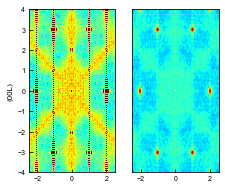

In [32]:
# MC neutron scattering
import matplotlib.colors as colors
%matplotlib ipympl
%matplotlib inline
latexify(fig_height=3)

fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab/'
fname = [r'nzo_MC_Jx_eq_-3p2Jz_0p08K.txt', 
         r'nzo_MC_Jx_eq_-3p3Jz_0p11K.txt']

fig, axs = plt.subplots(nrows=1, ncols=2)
#fig.subplots_adjust(wspace=0)

idx =0
sigma = [[0,0],[1,1]]
lab = ['(a)','(b)']
x = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=3, max_rows=1)
y = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=4, max_rows=1)
I = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=5)
I[np.isnan(I)] = np.nanmax(I)

#pcol = axs[0].pcolormesh(x, y, I.T/np.nanmax(I), norm=colors.LogNorm(vmin=0.0001,vmax=0.01), cmap='jet',linewidth=0,rasterized=True)
pcol = axs[0].pcolormesh(x, y, I.T/np.nanmax(I), vmin=0,vmax=0.001, cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') # remove the white lines in the plot
#axs[0].set_xlim([-2.5,0])    
axs[0].set_ylabel('(00L)')
axs[0].xaxis.set_label_coords(1, -0.5)

###
idx =1
sigma = [[0,0],[1,1]]
lab = ['(a)','(b)']
x = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=3, max_rows=1)
y = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=4, max_rows=1)
I = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=5)
pcol = axs[1].pcolormesh(x, y, I.T/np.nanmax(I), norm=colors.LogNorm(vmin=0.001,vmax=1), cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') 
#axs[1].set_xlim([0,2.5])
axs[1].set_yticks([])

#fig.savefig(os.path.join(fpath,fname[idx]).replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

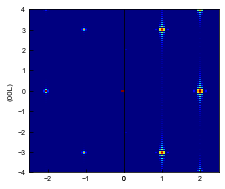

In [33]:
# MC neutron scattering of chains in [110] field
import matplotlib.colors as colors
#%matplotlib ipympl
#%matplotlib ipympl
latexify(fig_height=3)

fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab/'
fname = [r'nzo_MC_Jx_eq_-3p2Jz_0p08K.txt', 
         r'nzo_MC_Jx_eq_-3p3Jz_0p11K.txt']

idx =0
sigma = [[0,0],[1,1]]
lab = ['(a)','(b)']
x = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=3, max_rows=1)
y = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=4, max_rows=1)
I = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=5)

I[np.isnan(I)] = np.nanmax(I)
from scipy import ndimage
I = ndimage.gaussian_filter(I, sigma[idx], order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

fig, axs = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=0)

pcol = axs[0].pcolormesh(x, y, I.T/np.nanmax(I), vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') # remove the white lines in the plot
axs[0].set_xlim([-2.5,0])
    
axs[0].set_ylabel('(00L)')
axs[0].xaxis.set_label_coords(1, -0.5)
    
pcol = axs[1].pcolormesh(x, y, I.T/np.nanmax(I), norm=colors.LogNorm(vmin=0.001,vmax=1), cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') 
axs[1].set_xlim([0,2.5])
axs[1].set_yticks([])


#fig.savefig(os.path.join(fpath,fname[idx]).replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

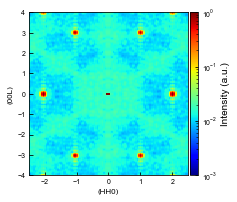

In [34]:
# MC neutron scattering of chains in [110] field
import matplotlib.colors as colors
latexify(fig_height=3)

fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab/'
fname = [r'nzo_MC_Jx_eq_-3p2Jz_0p08K.txt', 
         r'nzo_MC_Jx_eq_-3p3Jz_0p11K.txt']

idx =1
sigma = [[0.02,0.02],[1,1]]
lab = ['(a)','(b)']
x = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=3, max_rows=1)
y = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=4, max_rows=1)
I = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=5)

I[np.isnan(I)] = np.nanmax(I)
from scipy import ndimage
#I = ndimage.gaussian_filter(I, sigma[idx], order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

fig, axs = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(wspace=0)

#pcol = axs.pcolormesh(x, y, I.T/np.nanmax(I), vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
pcol = axs.pcolormesh(x, y, I.T/np.nanmax(I), norm=colors.LogNorm(vmin=0.001,vmax=1), cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') 
axs.set_xlim([-2.5,2.5])

axs.set_xlabel('(HH0)')
axs.set_ylabel('(00L)')
    
cb = plt.colorbar(pcol, aspect=20,pad=0.01,orientation="vertical") # label='Intensity', ticks=range(0,100)
cb.ax.set_ylabel('Intensity (a.u.)',fontsize=10)

#fig.savefig(os.path.join(fpath,fname[idx]).replace('txt','pdf'), bbox_inches="tight",pad_inches=0,verbose=True)  
plt.show()

### chi(T) and Cv(T) in one figure

(3, 3456, 50)


NameError: name 'Ts_1' is not defined

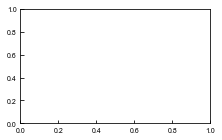

In [35]:
latexify(columns=1); 
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

fig, ax1 = plt.subplots(nrows=1, ncols=1)
kB = 0.0862
print(stdm.shape)

ax1.plot(Ts_1,   np.average(stdm_1**2,  axis=1)[0,:]/kB/Ts_1,  '-b',dashes=[8, 2], label=r'$\chi(\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1)$ ',lw=0.5)
ax1.plot(Ts,     np.average(stdm**2,    axis=1)[0,:]/kB/Ts,    '-b', label=r'$\chi(\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|\sim2)$ ',lw=0.5)
ax1.plot(Ts_2p9, np.average(stdm_2p9**2,axis=1)[0,:]/kB/Ts_2p9,'--b',label=r'$\chi (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=2.9)$',lw=0.5)
ax1.set_xlabel('T (K)')
ax1.set_ylabel(r'$\chi$')
ax1.legend(loc=(0.5,0.6),frameon=False,fontsize=8,handlelength=1.5,handletextpad=0.1,labelspacing=0)

ax2 = ax1.twinx()
ax2.plot(Ts_1,Cp_1,'--r',dashes=[8, 2],label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1)$',lw=0.5)
ax2.plot(Ts,Cp,c='r', label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|\sim2)$',lw=0.5)
ax2.plot(Ts_2p9,Cp_2p9,'--r',label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=2.9)$',lw=0.5)
ax2.set_ylabel(r'$C_v$', color='r')
ax2.yaxis.label.set_color('r')
ax2.spines["right"].set_edgecolor('r')
ax2.tick_params('y', colors='r')

ax2.set_xlim([0,0.5])
ax2.legend(loc=(0.5,0.2),frameon=False,fontsize=8,handlelength=1.5,handletextpad=0.1,labelspacing=0)
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_chi_cp_2.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

In [203]:
latexify(columns=1,fig_height=1.4); 
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2)
kB = 0.0862
print(stdm.shape)

ax1.plot(Ts_1,   np.average(stdm_1**2,  axis=1)[0,:]/kB/Ts_1,  '-r',dashes=[8, 2], label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1$ ',lw=0.5)
ax1.plot(Ts,     np.average(stdm**2,    axis=1)[0,:]/kB/Ts,    '-k', label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|\sim2$ ',lw=0.5)
ax1.plot(Ts_2p9, np.average(stdm_2p9**2,axis=1)[0,:]/kB/Ts_2p9,'--b',label=r'$\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=2.9$',lw=0.5)
ax1.set_xlabel('T (K)')
ax1.set_ylabel(r'$\chi$',labelpad=0)
ax1.set_xlim([0,0.5])
ax1.xaxis.set_ticks([0,0.1,0.2,0.3,0.4,0.5])
ax1.legend(loc=0,frameon=False,fontsize=8,handlelength=1.5,handletextpad=0.1,labelspacing=0)

ax2.plot(Ts_1,Cp_1,'--r',dashes=[8, 2],label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=1)$',   lw=0.5)
ax2.plot(Ts,Cp,    c='k',              label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|\sim2)$',lw=0.5)
ax2.plot(Ts_2p9,Cp_2p9,'--b',          label=r'$C_\mathrm{v} (\tilde{J}_\tilde{x}/|\tilde{J}_\tilde{z}|=2.9)$', lw=0.5)
ax2.set_xlabel('T (K)')
ax2.set_ylabel(r'$C_v$ (J/K/mol)', color='k',labelpad=0)
ax2.set_xlim([0,0.5])
ax2.xaxis.set_ticks([0,0.1,0.2,0.3,0.4,0.5])
ax2.set_ylim([0,30])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4)
fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_chi_cp_2.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

(3, 3456, 25)


In [145]:
# Plot average(|tau_{x,y,z}|)
latexify(columns=1)
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

# No insert the 0 K
Ts_2p9    = Ts_2p9
Mloc_av_2p9 = np.average(MlocAbs_2p9,1)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(Ts_2p9,Mloc_av_2p9[0,:],c='none',edgecolors='b',marker='^',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{x}|\rightangle$');ax.plot(Ts_2p9,Mloc_av_2p9[0,:],c='b',lw=0.5)
ax.scatter(Ts_2p9,Mloc_av_2p9[1,:],c='none',edgecolors='k',marker='s',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{y}|\rightangle$');ax.plot(Ts_2p9,Mloc_av_2p9[1,:],c='k',lw=0.5)
ax.scatter(Ts_2p9,Mloc_av_2p9[2,:],c='none',edgecolors='r',marker='o',s=6,lw=0.5, label=r'$\leftangle|\tau^\tilde{z}|\rightangle$');ax.plot(Ts_2p9,Mloc_av_2p9[2,:],c='r',lw=0.5)
ax.axhline(y=0.25,c='grey',lw=0.8,zorder=0)
ax.set_xlim([0,0.5])
ax.set_ylim([0,0.5])
ax.set_xlabel('T (K)')
ax.set_ylabel(r'$\leftangle|\tau^\alpha|\rightangle$')
ax.legend(frameon=False,ncol=2,fontsize=12,handlelength=1.5,handletextpad=0.01,columnspacing=0.1,labelspacing=0,loc=(0.4,0.6))
#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_mloc_xyz_av_2p9.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [134]:
# Histgarm for Jx/|Jz|=2.9
latexify(fig_height=3.,columns=2)
   
mathtextFontset = ['cm','stix', 'stixsans']
mpl.pyplot.rc('mathtext', fontset=mathtextFontset[0]) 

lablefs = 12

fig, axs = plt.subplots(nrows=2, ncols=3,sharex=True,sharey='row')

colors = mpl.cm.jet_r(np.linspace(0,1,50,endpoint=True))

texts = [[r'$\tau^\tilde{x}$', r'$\tau^\tilde{y}$', r'$\tau^\tilde{z}$'],
         [r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{x}$', 
          r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{y}$', 
          r'$\frac{1}{4}\sum_\boxtimes\tau^\tilde{z}$']]

for i in range(0,3):
    for j in range(49,0,-1):
        axs[0,i].plot(MhistCenters_2p9,MhistCounts_2p9[:,i,j]/3456,c=colors[j],lw=0.3)
    axs[0,i].text(0.8,0.8, texts[0][i], size=12, transform=axs[0,i].transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
    for j in range(49,0,-1):
        axs[1,i].plot(sumTetraHistCenters_2p9,sumTetraHistCounts_2p9[:,i,j]/1728,c=colors[j],lw=0.3)
    axs[1,i].text(0.7,0.8, texts[1][i], size=12, transform=axs[1,i].transAxes,
                  ha='center', va='center', backgroundcolor='none',bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
    axs[1,i].set_xticks(np.arange(-0.6, 0.6, step=0.2))
    axs[1,i].set_xlim([-0.5,0.5])
axs[0,0].set_ylim([0,0.03])
axs[1,0].set_ylim([0,0.08])
    
# colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=0.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig.subplots_adjust(bottom=0.1, top=0.98, left=0.09, right=1.05, wspace=0.0, hspace=0.08)
cb = plt.colorbar(cmap, ax=axs.flat,pad=0.01)
cb.set_ticks([x for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0, 0.6, 0.1)])
cb.ax.set_ylabel('T (K)',size=lablefs-2)

axs[1,0].set_xlabel(r'value',size=lablefs,labelpad=0)
axs[1,1].set_xlabel(r'value',size=lablefs,labelpad=0)
axs[1,2].set_xlabel(r'value',size=lablefs,labelpad=0)
axs[0,0].set_ylabel('pdf',size=lablefs,labelpad=5)
axs[1,0].set_ylabel('pdf',size=lablefs,labelpad=5)

#fig.savefig(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\mc_tau_hist_2p9.pdf', bbox_inches="tight", pad_inches=0,verbose=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

# Test

In [71]:
# Ｔｅｓｔ Ｐｌｏｔ　ｔｈｅ　ＣＮＣＳ　ｄａｔａ　ｏｆ　Ｎｄ２Ｚｒ２Ｏ７　ｅｘｐｏｒｔｅｄ　ｆｒｏｍ　Ｍａｔｌａｂ
%matplotlib inline
fpath=r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace'
fname = 'test.txt'
data = np.genfromtxt(os.path.join(fpath,fname)) # data is nE by nQ*nQ
x, y, z = data[:,0],data[:,1],data[:,2]

nx, ny = 109, 135 # nb of x and y values
X = np.reshape(x,[ny,nx])
Y = np.reshape(y,[ny,nx])
Z = z.reshape([ny,nx])
#print X,'\n', Y

# This two soomthing methods reduces the data area due to the data contianing Nan
# Smooth data 1: Gaussian filter
#http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun
# sigma_y = 0.5
# sigma_x = 0.5
# sigma = [sigma_y, sigma_x]
# Z = sp.ndimage.filters.gaussian_filter(Z, sigma, mode='constant',cval=np.nan)

# Smooth data 2: Convolute with Gaussian weight
# def gaussian(x, mu=0, sigma=1):
#     n = np.prod(sigma)*np.sqrt(2*np.pi)**len(x)
#     return np.exp(-0.5*(((x-mu)/sigma)**2).sum(0))/n
# weights = gaussian(np.indices((5,5)), mu=1, sigma=6)
# weights = weights / np.sum(weights[:])
# Z = sp.ndimage.filters.convolve(Z, weights, mode='reflect',cval=0)

# Smooth data 3: Use the user defined function
# this function will fill the holes, we can remove the filling
orig_nan = np.isnan(Z)
from smoothn import smoothn 
Z,s,exitflag,Wtot = smoothn(Z,s=0.8) 
Z[orig_nan]= np.nan
print(s)

# Mask Nan
z_min, z_max = np.nanmin(Z), np.nanmax(Z)
Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
#np.savetxt(r'D:\5_Neutron Scattering\5_CNCS_US_2015\nzo_SpinW_cal_dat_from_matlab\nzo_spinw1.txt', Z, delimiter=',')

# Plot
fig = plt.figure(figsize=(6,4))
# pcolormesh actually draws individual rectangles which contains white lines
cmap = plt.cm.RdBu_r
cmap = plt.cm.jet
cmap.set_bad('w',1.)
pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=0.04, cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

#Smooth fig with imshow: http://stackoverflow.com/questions/34230108/smoothing-imshow-plot-with-matplotlib
#imshow only for uniformly spaced point
#pcol = plt.imshow(Zm, interpolation='lanczos', cmap='RdBu_r',vmin=0, vmax=0.05, extent=[x.min(), x.max(),y.min(), y.max()])

#plt.title(r'Gd$_2$Zr$_2$O$_7$')

# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.axis([-3, 3, -4, 4])

plt.xlabel('[HH0]',size=14)
plt.ylabel('[00L]',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)

# set colorbar and its properties
cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
#cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

#cb.ax.tick_params(labelsize=12)
cb.set_ticks([x for x in np.arange(0, 0.05,0.01)])
cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, 0.05,0.01)], fontsize=12)#, weight='bold')

plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
# Ｔｅｓｔ
# ingore Nan when useing Gaussion filter
#https://mail.scipy.org/pipermail/scipy-user/2009-April/020838.html
# import numpy as np
# from scipy.ndimage import generic_filter

# # size of filter (in both directions)
# s = 31

# # center of filter (in both directions)
# c = 16

# # sigma of filter (in both directions)
# sigma = 5.

# # define gaussian function
# def gaussian(cx, cy, w):
#      return lambda x,y: np.exp(-(((cx-x)/w)**2+((cy-y)/w)**2)/2)

# # define gaussian filter
# x,y = np.mgrid[0:s,0:s]
# filt = gaussian(c,c,sigma)(x,y).ravel()

# # define custom filter
# def custom_filter(values):
#      mask = np.where(np.isnan(values) == False)
#      return np.sum(values[mask]*filt[mask])/np.sum(filt[mask])

# # the function to test the custom filter
# def do():
#      a = np.ones((300,300))
#      b =  
# generic_filter(a,custom_filter,size=s,mode='constant',cval=np.nan)

In [ ]:
# Smooth data
#http://stackoverflow.com/questions/33548639/how-can-i-smooth-elements-of-a-two-dimensional-array-with-differing-gaussian-fun

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.ndimage

n = 200 # widht/height of the array
m = 1000 # number of points
x = np.zeros((n, n)) 
i = np.random.choice(range(0, n * n), size=m)
x[i / n, i % n] = 1.0

# Arbitrary weights
weights = np.array([[0, 0, 1, 0, 0],
                    [0, 2, 4, 2, 0],
                    [1, 4, 8, 4, 1],
                    [0, 2, 4, 2, 0],
                    [0, 0, 1, 0, 0]],
                   dtype=np.float)
# Gaussian weight
def gaussian(x, mu=0, sigma=1):
    n = np.prod(sigma)*np.sqrt(2*np.pi)**len(x)
    return np.exp(-0.5*(((x-mu)/sigma)**2).sum(0))/n

weights = gaussian(np.indices((50,50)), mu=1, sigma=5)

weights = weights / np.sum(weights[:])
y = sp.ndimage.filters.convolve(x, weights, mode='reflect',cval=0)

# Display filtered array
fig = plt.figure(figsize=(6,4))
plt.imshow(y, cmap='Blues', interpolation='nearest')
plt.xlabel("$x$")
plt.ylabel("$y$")
#plt.savefig("smooth_array.png")
plt.show()